# **Dataset overview**

This notebook serves as a preamble to the exploration and provides an initial overview of the dataset, allowing us to understand its structure and nature without delving into the specifics of exploratory analysis. It will be followed by a relational analysis, as the dataset consists of multiple tables. These first two steps establish the framework and set the stage for the subsequent exploratory analysis work.

1. Learn about tables and their contents
    1. Main tables
        1. Metadata: `HomeCredit_columns_description`
        2. Central table (training set): `application_train`
        3. Central table (test set): `application_test`
        4. Kaggle's `sample_submission` file
    2. Out of Home Credit Client history
        1. Main table: `bureau`
        2. Monthly Details Table: `bureau_balance`
    3. Home Credit Client history
        1. `credit_card_balance`
        2. `POS_CASH_balance`
        3. `installments_payments`
        4. `previous_application`
2. Data Nature: Technical Types
    1. Variables Dictionary
    2. Constants
    3. Discrete Variables including Categorical Variables
    4. Primary Keys
    5. Numeric variables with more than 100 modalities
3. Nature of Data: Business Types
    ...
    

# 1\. Learn about tables and their contents

During this first pass, we briefly and individually discover each of the 9 + 1 tables and bring out the following information on each of them:
- the list of its fields, and for each of them :
    - the number `n` of values
    - the number `n_u` of unique values
    - the number `n_na` of missing values (including the hidden)
    - the filling rate `fr`
    - the ratio `vr` of the number of unique values to the number of values

This first qualitative information allows us to discover the nature of the data, to evaluate the quality of the data, to distinguish the types of fields (obvious simple primary keys and foreign keys, monetary and temporal quantitative variables, qualitative variables of geolocation and categorization).

Then we focus on determining primary keys (simple or compound), and then forming dataframes indexed by those keys. These dataframes will then serve as the basis for the merge (join) operations.

A first derived information is the exact quantification of unique entities (objects).

In [1]:
from home_credit.load import load_raw_table
from pepper.utils import show_discrete_stats

## 1.1. Main tables

### 1.1.1. Metadata: `HomeCredit_columns_description`

<mark>**TODO** : produire programmatiquement les rappels de définitions ci-après!</mark>

<mark>Ainsi, plus besoin d'un copier-coller dans chaque notebook !</mark>

Definition:
* This file contains descriptions for the columns in the various data files.

Définition :
* *Ce fichier contient les descriptions des colonnes des différents fichiers de données.*

#### Direct load

In [4]:
table_name = "HomeCredit_columns_description"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


RAW_HOMECREDIT_COLUMNS_DESCRIPTION,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,None
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,None
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,None
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,None
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,None


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_HomeCredit_columns_description,,,,,,
Unnamed: 0,219,219,0,1.000000,1.000000,int64
Table,219,7,0,1.000000,0.031963,object
Row,219,196,0,1.000000,0.894977,object
Description,219,163,0,1.000000,0.744292,object
Special,86,7,133,0.392694,0.081395,object


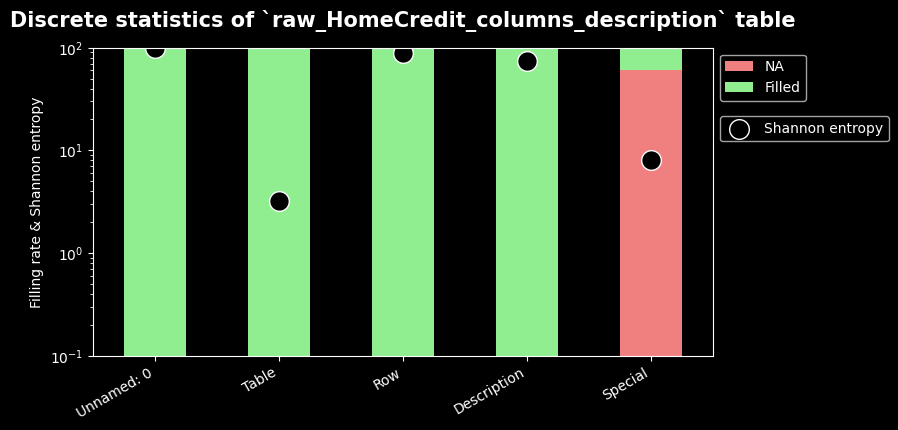

In [5]:
show_discrete_stats(table, f"raw_{table_name}")

### 1.1.2. Central table (training set): `application_train`

Definition:
* This is the main table, broken into two files for Train (with `TARGET`) and Test (without `TARGET`).
* Static data for all applications. One row represents one loan in our data sample.
* $86.3$ % ($307\,511$) of $356\,255$ samples.

Définition :
* *C'est la table principale, divisée en deux fichiers pour l'entraînement (avec `TARGET`) et le test (sans `TARGET`).*
* *Données statiques pour toutes les demandes de prêts. Une ligne représente un prêt dans notre échantillon de données.*
* *$86.3$ % ($307\,511$) de $356\,255$ échantillons.*

#### Direct load

In [7]:
table_name = "application_train"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt


RAW_APPLICATION_TRAIN,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_application_train,,,,,,
SK_ID_CURR,307511,307511,0,1.000000,1.000000,int64
TARGET,307511,2,0,1.000000,0.000007,int64
NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
CODE_GENDER,307511,3,0,1.000000,0.000010,object
FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.864984,0.000034,float64
AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.864984,0.000034,float64
AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64


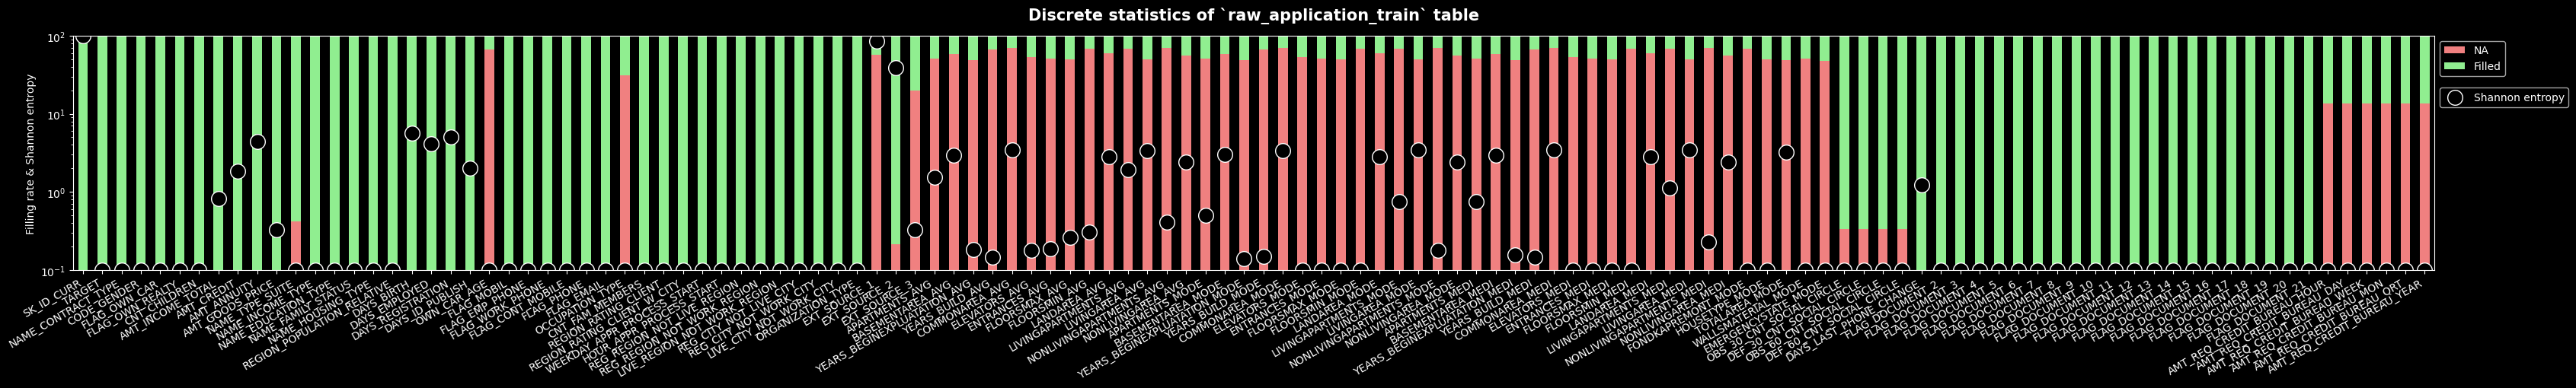

In [8]:
show_discrete_stats(table, f"raw_{table_name}", ratio=5)

### 1.1.3. Central table (test set): `application_test`

Definition:
* This is the main table, broken into two files for Train (with `TARGET`) and Test (without `TARGET`).
* Static data for all applications. One row represents one loan in our data sample.
* $13.7$ % ($48\,744$) of $356\,255$ samples.

Définition :
* *C'est la table principale, divisée en deux fichiers pour l'entraînement (avec `TARGET`) et le test (sans `TARGET`).*
* *Données statiques pour toutes les demandes de prêts. Une ligne représente un prêt dans notre échantillon de données.*
* *$13.7$ % ($48\,744$) de $356\,255$ échantillons.*

#### Direct load

In [9]:
table_name = "application_test"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt


RAW_APPLICATION_TEST,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_application_test,,,,,,
SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64
NAME_CONTRACT_TYPE,48744,2,0,1.000000,0.000041,object
CODE_GENDER,48744,2,0,1.000000,0.000041,object
FLAG_OWN_CAR,48744,2,0,1.000000,0.000041,object
FLAG_OWN_REALTY,48744,2,0,1.000000,0.000041,object
...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,42695,3,6049,0.875903,0.000070,float64
AMT_REQ_CREDIT_BUREAU_WEEK,42695,3,6049,0.875903,0.000070,float64
AMT_REQ_CREDIT_BUREAU_MON,42695,7,6049,0.875903,0.000164,float64


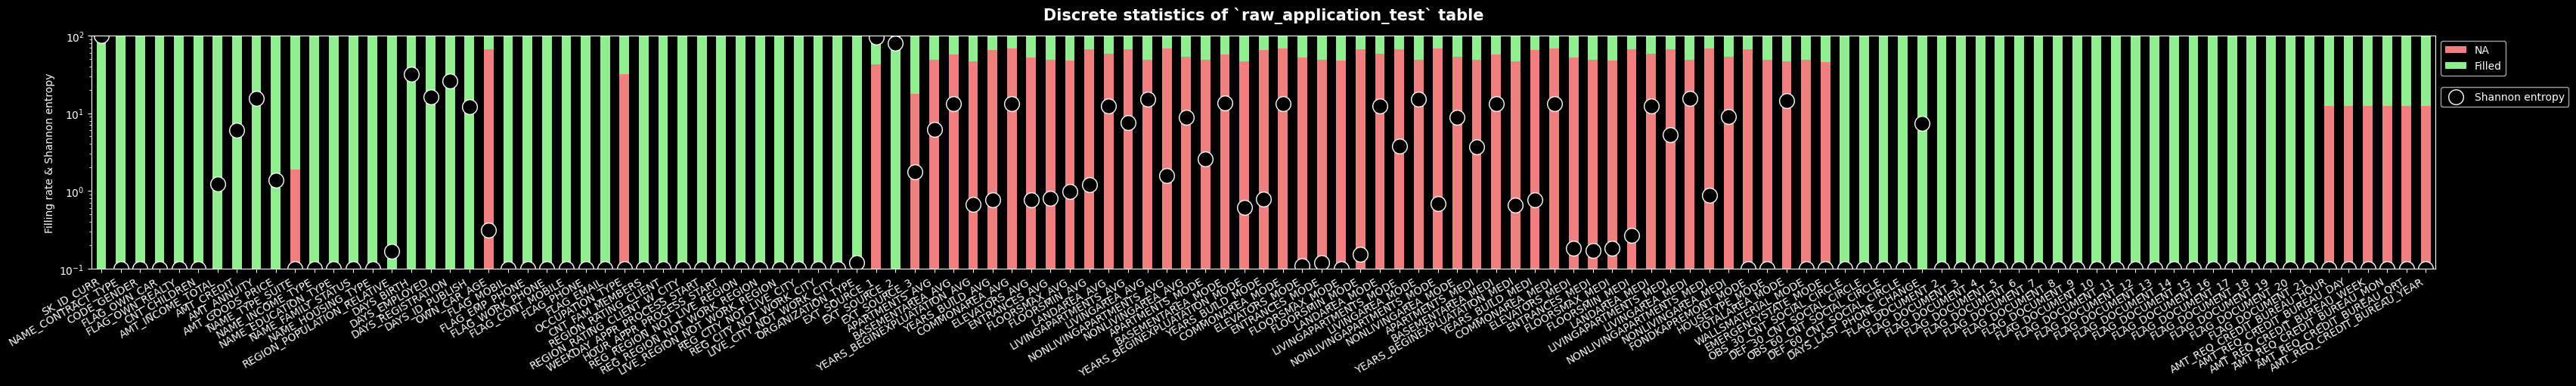

In [10]:
show_discrete_stats(table, f"raw_{table_name}", ratio=5)

### 1.1.4. Kaggle's `sample_submission` file

As samples as `application_test` table : $48\,744$.

#### Direct load

In [11]:
table_name = "sample_submission"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\sample_submission.pqt


RAW_SAMPLE_SUBMISSION,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_sample_submission,,,,,,
SK_ID_CURR,48744,48744,0,1.0,1.000000,int64
TARGET,48744,1,0,1.0,0.000021,float64


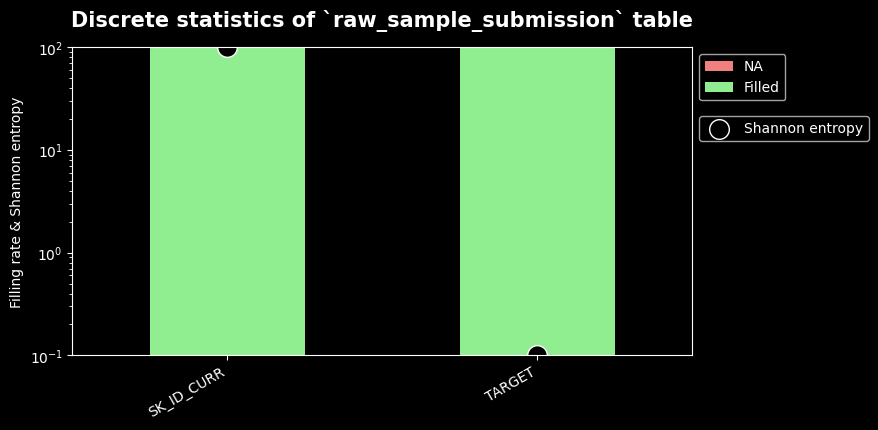

In [12]:
show_discrete_stats(table, f"raw_{table_name}")

## 1.2. Out of Home Credit Client history

The Credit Bureau is the Home Credit's Information Agency that collects external data about its clients.

### 1.2.1. Main table: `bureau`

Definition:
* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

Définition :
* *Tous les précédents crédits des clients fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).*
* *Pour chaque prêt dans notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le bureau de crédit avant la date de la demande.*

#### Direct load

In [13]:
table_name = "bureau"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt


RAW_BUREAU,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_bureau,,,,,,
SK_ID_CURR,1716428,305811,0,1.000000,0.178167,int64
SK_ID_BUREAU,1716428,1716428,0,1.000000,1.000000,int64
CREDIT_ACTIVE,1716428,4,0,1.000000,0.000002,object
CREDIT_CURRENCY,1716428,4,0,1.000000,0.000002,object
DAYS_CREDIT,1716428,2923,0,1.000000,0.001703,int64
CREDIT_DAY_OVERDUE,1716428,942,0,1.000000,0.000549,int64
DAYS_CREDIT_ENDDATE,1610875,14096,105553,0.938504,0.008751,float64
DAYS_ENDDATE_FACT,1082775,2917,633653,0.630830,0.002694,float64
AMT_CREDIT_MAX_OVERDUE,591940,68251,1124488,0.344867,0.115301,float64


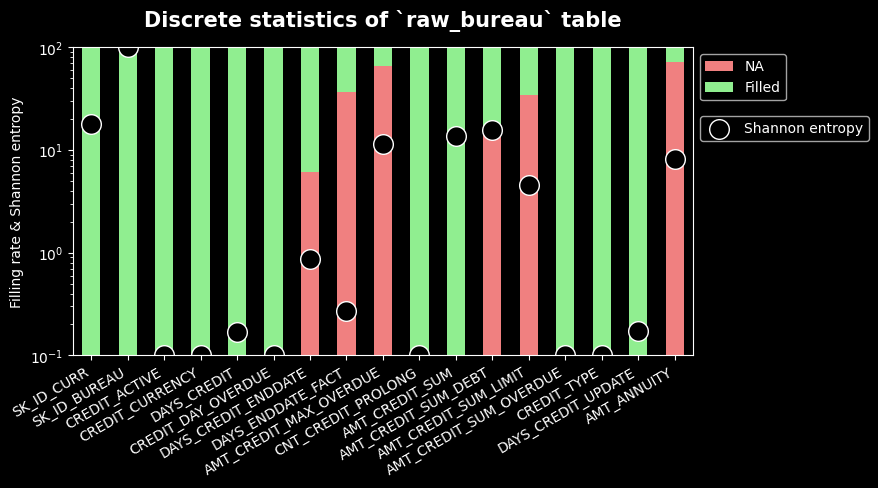

In [14]:
show_discrete_stats(table, f"raw_{table_name}")

### 1.2.2. Monthly Details Table: `bureau_balance`

Definition:
* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

Définition :
* *Soldes mensuels des précédents crédits signalés au bureau de crédit.*
* *Cette table a une ligne pour chaque mois de l'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que la table a (# prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons une historique observable pour les crédits précédents) de lignes.*

#### Direct load

In [15]:
table_name = "bureau_balance"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt


RAW_BUREAU_BALANCE,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_bureau_balance,,,,,,
SK_ID_BUREAU,27299925,817395,0,1.0,2.994129e-02,int64
MONTHS_BALANCE,27299925,97,0,1.0,3.553123e-06,int64
STATUS,27299925,8,0,1.0,2.930411e-07,object


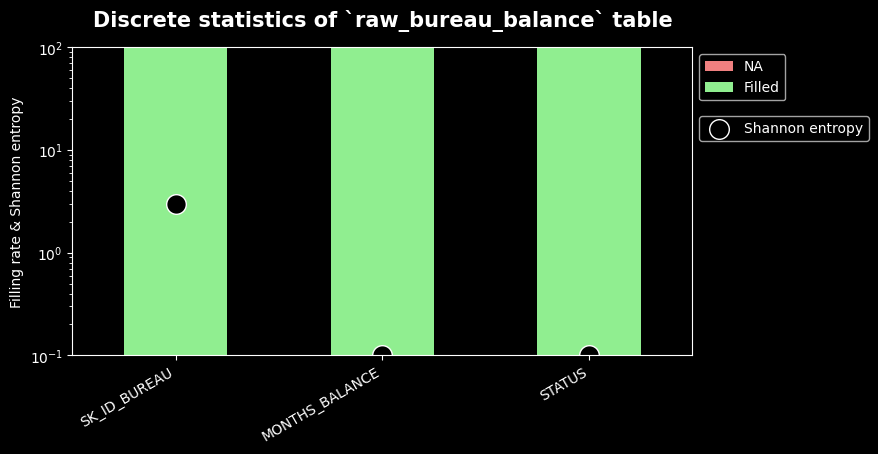

In [16]:
show_discrete_stats(table, f"raw_{table_name}")

## 1.3. Home Credit Client history

### 1.3.1. `credit_card_balance`

Definition:
* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

Définition :
* *Instantanés mensuels des soldes des précédentes cartes de crédit que le demandeur a avec Home Credit.*
* *Cette table a une ligne pour chaque mois de l'historique de chaque crédit précédent de cartes de crédit à Home Credit (crédit à la consommation et prêts en espèces) relatifs aux prêts dans notre échantillon - c'est-à-dire que la table a (# prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons une historique observable pour la carte de crédit précédente) de lignes.*

#### Direct load

In [17]:
table_name = "credit_card_balance"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt


RAW_CREDIT_CARD_BALANCE,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_credit_card_balance,,,,,,
SK_ID_PREV,3840312,104307,0,1.000000,0.027161,int64
SK_ID_CURR,3840312,103558,0,1.000000,0.026966,int64
MONTHS_BALANCE,3840312,96,0,1.000000,0.000025,int64
AMT_BALANCE,3840312,1347904,0,1.000000,0.350988,float64
AMT_CREDIT_LIMIT_ACTUAL,3840312,181,0,1.000000,0.000047,int64
AMT_DRAWINGS_ATM_CURRENT,3090496,2267,749816,0.804751,0.000734,float64
AMT_DRAWINGS_CURRENT,3840312,187005,0,1.000000,0.048695,float64
AMT_DRAWINGS_OTHER_CURRENT,3090496,1832,749816,0.804751,0.000593,float64
AMT_DRAWINGS_POS_CURRENT,3090496,168748,749816,0.804751,0.054602,float64


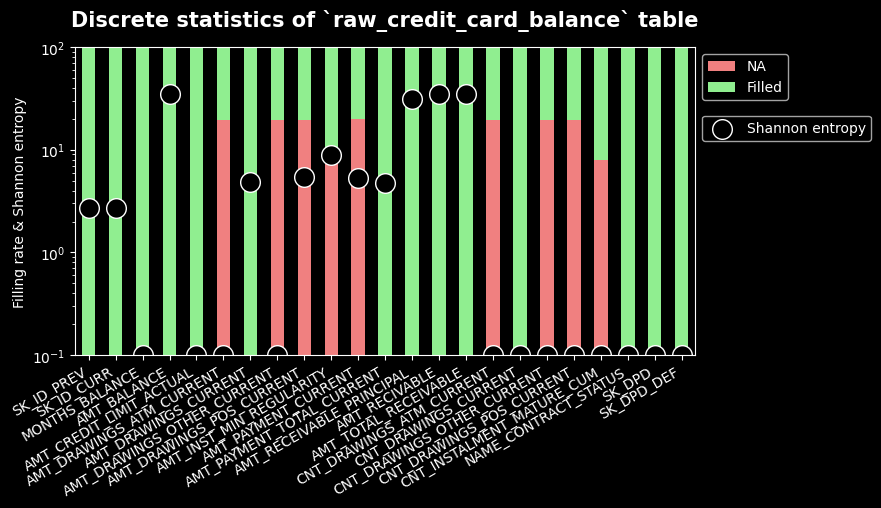

In [18]:
show_discrete_stats(table, f"raw_{table_name}")

### 1.3.2. `POS_CASH_balance`

Definition:
* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

Définition :
* *Instantanés de solde mensuel des prêts antérieurs en points de vente (POS) et en espèces que le demandeur avait avec Home Credit.*
* *Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent chez Home Credit (crédit à la consommation et prêts en espèces) lié aux prêts dans notre échantillon - c'est-à-dire que la table a (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois pour lesquels nous avons un historique observable pour les crédits précédents) de lignes.*

#### Direct load

In [19]:
table_name = "POS_CASH_balance"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt


RAW_POS_CASH_BALANCE,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_POS_CASH_balance,,,,,,
SK_ID_PREV,10001358,936325,0,1.000000,9.361979e-02,int64
SK_ID_CURR,10001358,337252,0,1.000000,3.372062e-02,int64
MONTHS_BALANCE,10001358,96,0,1.000000,9.598696e-06,int64
CNT_INSTALMENT,9975287,73,26071,0.997393,7.318085e-06,float64
CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997392,7.919584e-06,float64
NAME_CONTRACT_STATUS,10001358,9,0,1.000000,8.998778e-07,object
SK_DPD,10001358,3400,0,1.000000,3.399538e-04,int64
SK_DPD_DEF,10001358,2307,0,1.000000,2.306687e-04,int64


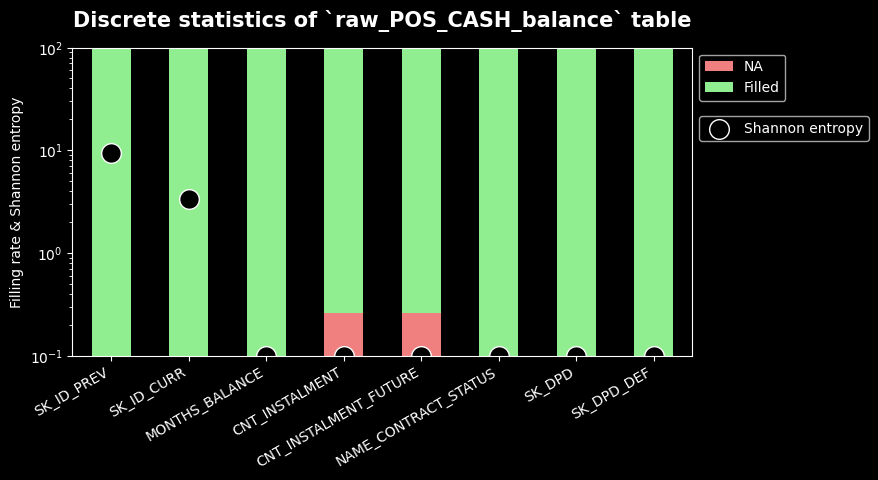

In [20]:
show_discrete_stats(table, f"raw_{table_name}")

### 1.3.3. `installments_payments`

Definition:
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

Définition :
* *Historique de remboursement pour les crédits précédemment accordés par Home Credit liés aux prêts dans notre échantillon.*
* *Il y a a) une ligne pour chaque paiement effectué et b) une ligne pour chaque paiement manqué.*
* *Une ligne correspond à un paiement d'une échéance ou à une échéance correspondant à un paiement pour un crédit Home Credit précédent lié aux prêts dans notre échantillon.*

#### Direct load

In [21]:
table_name = "installments_payments"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt


RAW_INSTALLMENTS_PAYMENTS,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_installments_payments,,,,,,
SK_ID_PREV,13605401,997752,0,1.000000,0.073335,int64
SK_ID_CURR,13605401,339587,0,1.000000,0.024960,int64
NUM_INSTALMENT_VERSION,13605401,65,0,1.000000,0.000005,float64
NUM_INSTALMENT_NUMBER,13605401,277,0,1.000000,0.000020,int64
DAYS_INSTALMENT,13605401,2922,0,1.000000,0.000215,float64
DAYS_ENTRY_PAYMENT,13602496,3039,2905,0.999786,0.000223,float64
AMT_INSTALMENT,13605401,902539,0,1.000000,0.066337,float64
AMT_PAYMENT,13602496,944235,2905,0.999786,0.069416,float64


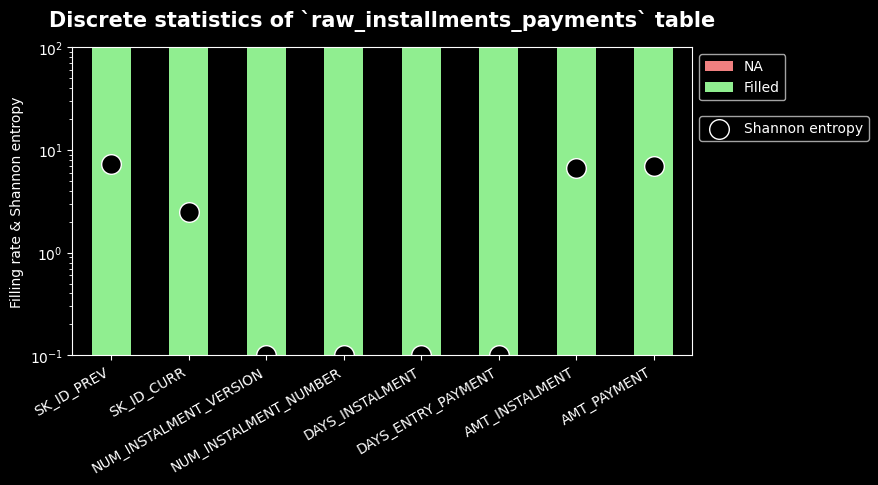

In [22]:
show_discrete_stats(table, f"raw_{table_name}")

### 1.3.4. `previous_application`

Definition:
* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

Définition :
* *Toutes les précédentes demandes de prêt Home Credit des clients qui ont des prêts dans notre échantillon.*
* *Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.*

#### Direct load

In [23]:
table_name = "previous_application"
table = load_raw_table(table_name)
display(table.head(5))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


RAW_PREVIOUS_APPLICATION,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Discrete stats

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
raw_previous_application,,,,,,
SK_ID_PREV,1670214,1670214,0,1.000000,1.000000,int64
SK_ID_CURR,1670214,338857,0,1.000000,0.202882,int64
NAME_CONTRACT_TYPE,1670214,4,0,1.000000,0.000002,object
AMT_ANNUITY,1297979,357959,372235,0.777133,0.275782,float64
AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
AMT_CREDIT,1670213,86803,1,0.999999,0.051971,float64
AMT_DOWN_PAYMENT,774370,29278,895844,0.463635,0.037809,float64
AMT_GOODS_PRICE,1284699,93885,385515,0.769182,0.073079,float64
WEEKDAY_APPR_PROCESS_START,1670214,7,0,1.000000,0.000004,object


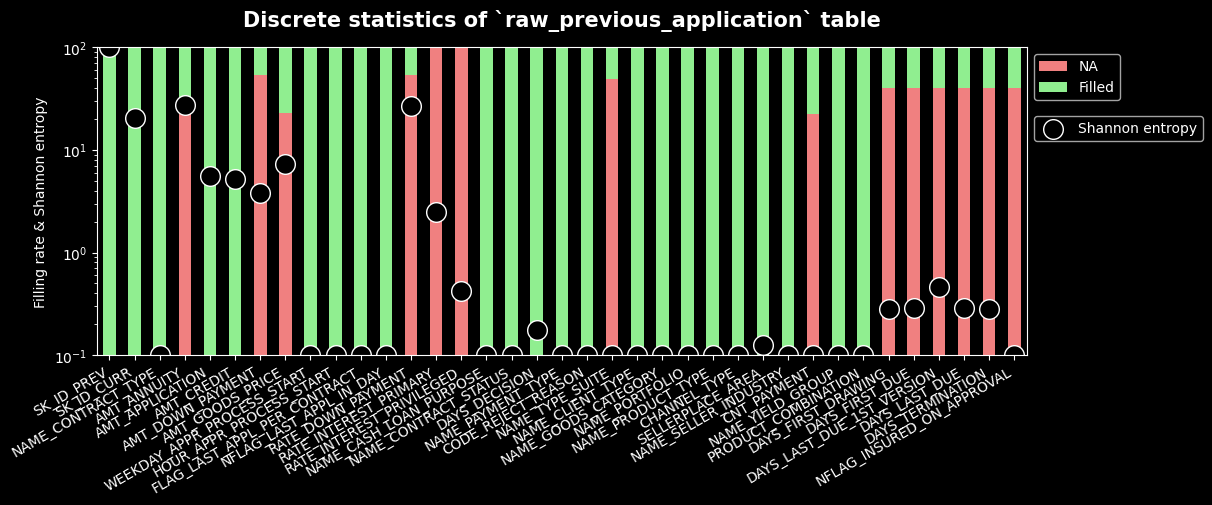

In [24]:
show_discrete_stats(table, f"raw_{table_name}", ratio=1.5)

# 2\. Data Nature: Technical Types

The objective of this section is to assess the nature of variables by categorizing them according to their technical types.

By technical type, we refer to the distinction between quantitative and qualitative nature, the primitive type (which needs to be inferred since the raw CSV data is not typed), the number of modalities that differentiates between continuous and discrete variables, considering that there exists a gray area of indeterminacy between these two categories. Additionally, for discrete numerical variables, we explore their cardinal or ordinal nature.

To conduct this analysis, we start by building a dictionary of all variables (columns) across all tables, totaling 346 variables. This approach allows us to verify the completeness of the provided dictionary (`HomeCredit_columns_description`) and avoid relying solely on it.

Next, we perform a simple discrete analysis to determine the number of modalities and the ratio of modalities to individuals (Shannon entropy). For example, this analysis enables us to identify that one-fifth of the variables are binary and helps in identifying primary keys.

## 2.1. Variables Dictionary

Let's start by building a dictionary of the data (345 variables).

This dictionary will be useful for the rest of this analysis.

In [2]:
from home_credit.utils import get_tables_dict
table_dict = get_tables_dict(raw=True)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\credit_card_balance.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\installments_payments.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\sample_submission.pqt


In [3]:
from pepper.db_utils import db_discrete_stats
variables = db_discrete_stats(table_dict)
display(variables)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.000000,1.000000,int64
1,previous_application,SK_ID_CURR,1670214,338857,0,1.000000,0.202882,int64
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,0.000002,object
3,previous_application,AMT_ANNUITY,1297979,357959,372235,0.777133,0.275782,float64
4,previous_application,AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
...,...,...,...,...,...,...,...,...
340,columns_description,Column,219,196,0,1.000000,0.894977,object
341,columns_description,Description,219,163,0,1.000000,0.744292,object
342,columns_description,Special,86,7,133,0.392694,0.081395,object
343,sample_submission,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64


### Cross-Reference with Description Table

Let's cross-reference the variables with the description table (`HomeCredit_columns_description`) to identify the variables that are not documented and vice versa:

In [4]:
from home_credit.load import get_columns_description
col_descs = get_columns_description()
display(col_descs.head(5))

col_descs,Table,Column,Description,Special
col_id,,,,
1,application_{train|test},SK_ID_CURR,ID of loan in our sample,None
2,application_{train|test},TARGET,Target variable (1 - client with payment diffi...,None
5,application_{train|test},NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,None
6,application_{train|test},CODE_GENDER,Gender of the client,None
7,application_{train|test},FLAG_OWN_CAR,Flag if the client owns a car,None


In [5]:
# Get the (table name, col name) couples
comp_vars = variables[variables.columns[:2]].copy()
# Lowercase and remove _train and _test suffixes
comp_vars.table_name = (
    comp_vars.table_name
    .str.lower()
    .str.replace("_(train|test)", "", regex=True)
)
# Remove _train|_test duplicates
comp_vars.drop_duplicates(inplace=True, ignore_index=True)
# One column join
comp_var_keys = comp_vars.apply(tuple, axis=1)
display(comp_var_keys)

0              (previous_application, SK_ID_PREV)
1              (previous_application, SK_ID_CURR)
2      (previous_application, NAME_CONTRACT_TYPE)
3             (previous_application, AMT_ANNUITY)
4         (previous_application, AMT_APPLICATION)
                          ...                    
219                 (columns_description, Column)
220            (columns_description, Description)
221                (columns_description, Special)
222               (sample_submission, SK_ID_CURR)
223                   (sample_submission, TARGET)
Length: 224, dtype: object

In [6]:
# Get the (table name, col name) couples
comp_descs = col_descs[col_descs.columns[:2]].copy()
# Remove _train and _test suffixes
comp_descs.Table = comp_descs.Table.str.replace("_{train|test}", "", regex=False)
# Remove _train|_test duplicates
comp_descs.drop_duplicates(inplace=True, ignore_index=True)
# One column join
comp_desc_keys = comp_descs.apply(tuple, axis=1)
display(comp_desc_keys)

0                           (application, SK_ID_CURR)
1                               (application, TARGET)
2                   (application, NAME_CONTRACT_TYPE)
3                          (application, CODE_GENDER)
4                         (application, FLAG_OWN_CAR)
                            ...                      
214    (installments_payments, NUM_INSTALMENT_NUMBER)
215          (installments_payments, DAYS_INSTALMENT)
216       (installments_payments, DAYS_ENTRY_PAYMENT)
217           (installments_payments, AMT_INSTALMENT)
218              (installments_payments, AMT_PAYMENT)
Length: 219, dtype: object

### Undocumented Variables

The undocumented variables consist of the variables from the documentation (HomeCredit_columns_description) and the variables from the submission example (sample_submission). There is nothing abnormal about this.

In [7]:
vars_without_desc = comp_var_keys[~comp_var_keys.isin(comp_desc_keys)]
display(vars_without_desc)

218          (columns_description, Table)
219         (columns_description, Column)
220    (columns_description, Description)
221        (columns_description, Special)
222       (sample_submission, SK_ID_CURR)
223           (sample_submission, TARGET)
dtype: object

### Documented but non-existent

Surprise! The variable `NFLAG_MICRO_CASH` associated with the `previous_application` table does not exist in the provided dataset.

In [8]:
descs_without_car = comp_desc_keys[~comp_desc_keys.isin(comp_var_keys)]
display(descs_without_car)

185    (previous_application, NFLAG_MICRO_CASH)
dtype: object

In [9]:
from home_credit.utils import help_cols
help_cols("NFLAG_MICRO_CASH")

|Table|Column|Description|Special|
|-|-|-|-|
|previous_application|NFLAG_MICRO_CASH|Flag Micro finance loan|_|

## 2.2 Constants

Constants provide no information and can be eliminated.

Here, the only constants observed are in the test set and the sample submission (`TARGET`).

📌 Regarding the test set, these are some of the document submission indicators (`FLAG_DOCUMENT_[2, 10:17, 19:21]`). Either these indicators have been falsified in the test set (their value has been fixed), or they were part of the extraction key for the test set compared to the complete set (unlikely, but a hypothesis to consider).

In [9]:
const_vars = variables[variables.n_u == 1]
display(const_vars)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
313,application_test,FLAG_DOCUMENT_2,48744,1,0,1.0,0.000021,int64
321,application_test,FLAG_DOCUMENT_10,48744,1,0,1.0,0.000021,int64
323,application_test,FLAG_DOCUMENT_12,48744,1,0,1.0,0.000021,int64
324,application_test,FLAG_DOCUMENT_13,48744,1,0,1.0,0.000021,int64
325,application_test,FLAG_DOCUMENT_14,48744,1,0,1.0,0.000021,int64
326,application_test,FLAG_DOCUMENT_15,48744,1,0,1.0,0.000021,int64
327,application_test,FLAG_DOCUMENT_16,48744,1,0,1.0,0.000021,int64
328,application_test,FLAG_DOCUMENT_17,48744,1,0,1.0,0.000021,int64
330,application_test,FLAG_DOCUMENT_19,48744,1,0,1.0,0.000021,int64
331,application_test,FLAG_DOCUMENT_20,48744,1,0,1.0,0.000021,int64


In [10]:
from home_credit.utils import help_cols
help_cols(const_vars.col)

|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|_|
|application_{train\|test}|FLAG_DOCUMENT_2|Did client provide document 2|_|
|application_{train\|test}|FLAG_DOCUMENT_10|Did client provide document 10|_|
|application_{train\|test}|FLAG_DOCUMENT_12|Did client provide document 12|_|
|application_{train\|test}|FLAG_DOCUMENT_13|Did client provide document 13|_|
|application_{train\|test}|FLAG_DOCUMENT_14|Did client provide document 14|_|
|application_{train\|test}|FLAG_DOCUMENT_15|Did client provide document 15|_|
|application_{train\|test}|FLAG_DOCUMENT_16|Did client provide document 16|_|
|application_{train\|test}|FLAG_DOCUMENT_17|Did client provide document 17|_|
|application_{train\|test}|FLAG_DOCUMENT_19|Did client provide document 19|_|
|application_{train\|test}|FLAG_DOCUMENT_20|Did client provide document 20|_|
|application_{train\|test}|FLAG_DOCUMENT_21|Did client provide document 21|_|

Given the above, and for the rest of the analysis, we eliminate from our variable dictionary the variables from the tables `application_test`, `sample_submission`, and `HomeCredit_columns_description`:

In [37]:
display(variables[variables.table_name.isin([
    "application_test", "sample_submission", "columns_description"
])])

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
218,application_test,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64
219,application_test,NAME_CONTRACT_TYPE,48744,2,0,1.000000,0.000041,object
220,application_test,CODE_GENDER,48744,2,0,1.000000,0.000041,object
221,application_test,FLAG_OWN_CAR,48744,2,0,1.000000,0.000041,object
222,application_test,FLAG_OWN_REALTY,48744,2,0,1.000000,0.000041,object
...,...,...,...,...,...,...,...,...
340,columns_description,Column,219,196,0,1.000000,0.894977,object
341,columns_description,Description,219,163,0,1.000000,0.744292,object
342,columns_description,Special,86,7,133,0.392694,0.081395,object
343,sample_submission,SK_ID_CURR,48744,48744,0,1.000000,1.000000,int64


We are left with only 218 relevant variables:

In [4]:
variables_ = variables[~variables.table_name.isin([
    "application_test", "sample_submission", "columns_description"
])]
display(variables_)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.000000,1.000000,int64
1,previous_application,SK_ID_CURR,1670214,338857,0,1.000000,0.202882,int64
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,0.000002,object
3,previous_application,AMT_ANNUITY,1297979,357959,372235,0.777133,0.275782,float64
4,previous_application,AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
...,...,...,...,...,...,...,...,...
213,application_train,AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.864984,0.000034,float64
214,application_train,AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.864984,0.000034,float64
215,application_train,AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64
216,application_train,AMT_REQ_CREDIT_BUREAU_QRT,265992,11,41519,0.864984,0.000041,float64


## 2.3. Discrete Variables including Categorical Variables

The main challenge is to anticipate the number of columns that will be generated later in the data preparation phase for modeling, specifically through one-hot encoding of categories.

The secondary objective is to gain an initial understanding of the types of categories.

### 40 (18%) Binary Variables

These are 40 (18%) variables, representing 80 categories. They are mainly `FLAG_*` variables (business-type indicated by the prefix).

Performing one-hot encoding using `get_dummies` on these variables will not increase the number of columns but will convert all types (`int64`, `object`) to `bool`.

**Note**: The only case where a `FLAG_*` variable is of type `float` (`NFLAG_INSURED_ON_APPROVAL`) is due to the presence of missing values (NA).

📌 If the two missing value cases (`EMERGENCYSTATE_MODE`, `NFLAG_INSURED_ON_APPROVAL`) have not been imputed or removed, the one-hot encoding will treat them as a separate category, resulting in the creation of an additional column.

In [13]:
binary_vars = variables_[variables_.n_u == 2]
print("n_vars:", len(binary_vars))
print("n_mods:", binary_vars.n_u.sum())
display(binary_vars)

n_vars: 40
n_mods: 80


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
10,previous_application,FLAG_LAST_APPL_PER_CONTRACT,1670214,2,0,1.000000,0.000001,object
11,previous_application,NFLAG_LAST_APPL_IN_DAY,1670214,2,0,1.000000,0.000001,int64
36,previous_application,NFLAG_INSURED_ON_APPROVAL,997149,2,673065,0.597019,0.000002,float64
97,application_train,TARGET,307511,2,0,1.000000,0.000007,int64
98,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
100,application_train,FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
101,application_train,FLAG_OWN_REALTY,307511,2,0,1.000000,0.000007,object
118,application_train,FLAG_MOBIL,307511,2,0,1.000000,0.000007,int64
119,application_train,FLAG_EMP_PHONE,307511,2,0,1.000000,0.000007,int64
120,application_train,FLAG_WORK_PHONE,307511,2,0,1.000000,0.000007,int64


In [14]:
help_cols(binary_vars.col)

|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|_|
|application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
|application_{train\|test}|FLAG_OWN_CAR|Flag if the client owns a car|_|
|application_{train\|test}|FLAG_OWN_REALTY|Flag if client owns a house or flat|_|
|application_{train\|test}|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|_|
|application_{train\|test}|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|_|
|application_{train\|test}|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|_|
|application_{train\|test}|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|_|
|application_{train\|test}|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|_|
|application_{train\|test}|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|_|
|application_{train\|test}|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|_|
|application_{train\|test}|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLAG_DOCUMENT_2|Did client provide document 2|_|
|application_{train\|test}|FLAG_DOCUMENT_3|Did client provide document 3|_|
|application_{train\|test}|FLAG_DOCUMENT_4|Did client provide document 4|_|
|application_{train\|test}|FLAG_DOCUMENT_5|Did client provide document 5|_|
|application_{train\|test}|FLAG_DOCUMENT_6|Did client provide document 6|_|
|application_{train\|test}|FLAG_DOCUMENT_7|Did client provide document 7|_|
|application_{train\|test}|FLAG_DOCUMENT_8|Did client provide document 8|_|
|application_{train\|test}|FLAG_DOCUMENT_9|Did client provide document 9|_|
|application_{train\|test}|FLAG_DOCUMENT_10|Did client provide document 10|_|
|application_{train\|test}|FLAG_DOCUMENT_11|Did client provide document 11|_|
|application_{train\|test}|FLAG_DOCUMENT_12|Did client provide document 12|_|
|application_{train\|test}|FLAG_DOCUMENT_13|Did client provide document 13|_|
|application_{train\|test}|FLAG_DOCUMENT_14|Did client provide document 14|_|
|application_{train\|test}|FLAG_DOCUMENT_15|Did client provide document 15|_|
|application_{train\|test}|FLAG_DOCUMENT_16|Did client provide document 16|_|
|application_{train\|test}|FLAG_DOCUMENT_17|Did client provide document 17|_|
|application_{train\|test}|FLAG_DOCUMENT_18|Did client provide document 18|_|
|application_{train\|test}|FLAG_DOCUMENT_19|Did client provide document 19|_|
|application_{train\|test}|FLAG_DOCUMENT_20|Did client provide document 20|_|
|application_{train\|test}|FLAG_DOCUMENT_21|Did client provide document 21|_|
|previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
|previous_application|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|_|
|previous_application|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|_|
|previous_application|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|_|

### 34 (16%) Variables with 3 to 10 Categories

There are 36 variables representing 220 categories. The variables prefixed with `NAME_*` (indicating business types) are particularly well-represented in this group.

In [15]:
mod_3_10_vars = variables_[(variables_.n_u > 2) & (variables_.n_u < 11)]
print("n_vars:", len(mod_3_10_vars))
print("n_mods:", mod_3_10_vars.n_u.sum())
display(mod_3_10_vars)

n_vars: 36
n_mods: 220


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
8,previous_application,WEEKDAY_APPR_PROCESS_START,1670214,7,0,1.000000,4.191080e-06,object
16,previous_application,NAME_CONTRACT_STATUS,1670214,4,0,1.000000,2.394903e-06,object
18,previous_application,NAME_PAYMENT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
19,previous_application,CODE_REJECT_REASON,1670214,9,0,1.000000,5.388531e-06,object
20,previous_application,NAME_TYPE_SUITE,849809,7,820405,0.508802,8.237145e-06,object
21,previous_application,NAME_CLIENT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
23,previous_application,NAME_PORTFOLIO,1670214,5,0,1.000000,2.993628e-06,object
24,previous_application,NAME_PRODUCT_TYPE,1670214,3,0,1.000000,1.796177e-06,object
25,previous_application,CHANNEL_TYPE,1670214,8,0,1.000000,4.789805e-06,object


In [16]:
help_cols(mod_3_10_vars.col)

|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
|application_{train\|test}|CODE_GENDER|Gender of the client|_|
|application_{train\|test}|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|_|
|application_{train\|test}|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,�)|_|
|application_{train\|test}|NAME_EDUCATION_TYPE|Level of highest education the client achieved|_|
|application_{train\|test}|NAME_FAMILY_STATUS|Family status of the client|_|
|application_{train\|test}|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|_|
|application_{train\|test}|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|_|
|application_{train\|test}|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|_|
|application_{train\|test}|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|_|
|application_{train\|test}|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |_|
|application_{train\|test}|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|_|
|bureau|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|_|
|bureau|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded|
|bureau|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|_|
|bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|
|pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
|credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
|previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
|previous_application|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|_|
|previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|
|previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
|previous_application|CODE_REJECT_REASON|Why was the previous application rejected|_|
|previous_application|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|_|
|previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
|previous_application|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, �|_|
|previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
|previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|
|previous_application|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped|

### 19 (9%) Variables with 11 to 30 Categories

There are 19 variables representing 396 categories in this group.

In [17]:
mod_11_30_vars = variables_[(variables_.n_u > 10) & (variables_.n_u < 31)]
print("n_vars:", len(mod_11_30_vars))
print("n_mods:", mod_11_30_vars.n_u.sum())
display(mod_11_30_vars)

n_vars: 19
n_mods: 396


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
9,previous_application,HOUR_APPR_PROCESS_START,1670214,24,0,1.000000,0.000014,int64
14,previous_application,RATE_INTEREST_PRIVILEGED,5951,25,1664263,0.003563,0.004201,float64
15,previous_application,NAME_CASH_LOAN_PURPOSE,1670214,25,0,1.000000,0.000015,object
22,previous_application,NAME_GOODS_CATEGORY,1670214,28,0,1.000000,0.000017,object
27,previous_application,NAME_SELLER_INDUSTRY,1670214,11,0,1.000000,0.000007,object
30,previous_application,PRODUCT_COMBINATION,1669868,17,346,0.999793,0.000010,object
51,bureau,CREDIT_TYPE,1716428,15,0,1.000000,0.000009,object
82,credit_card_balance,CNT_DRAWINGS_OTHER_CURRENT,3090496,11,749816,0.804751,0.000004,float64
102,application_train,CNT_CHILDREN,307511,15,0,1.000000,0.000049,int64
124,application_train,OCCUPATION_TYPE,211120,18,96391,0.686545,0.000085,object


In [18]:
help_cols(mod_11_30_vars.col)

|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|CNT_CHILDREN|Number of children the client has|_|
|application_{train\|test}|OCCUPATION_TYPE|What kind of occupation does the client have|_|
|application_{train\|test}|CNT_FAM_MEMBERS|How many family members does client have|_|
|application_{train\|test}|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
|application_{train\|test}|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|
|bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|
|credit_card_balance|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|_|
|previous_application|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|
|previous_application|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized|
|previous_application|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|_|
|previous_application|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|_|
|previous_application|NAME_SELLER_INDUSTRY|The industry of the seller|_|
|previous_application|PRODUCT_COMBINATION|Detailed product combination of the previous application|_|

### 17 (8%) Variables with 31 to 100 Categories

There are 17 variables representing 1054 categories in this group.

📌 It follows that 236 variables (68%) have more than 100 categories. However, this does not imply that there are no hidden categorical variables among them.

In [19]:
mod_31_100_vars = variables_[(variables_.n_u > 30) & (variables_.n_u < 101)]
print("n_vars:", len(mod_31_100_vars))
print("n_mods:", mod_31_100_vars.n_u.sum())
display(mod_31_100_vars)

n_vars: 17
n_mods: 1054


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
28,previous_application,CNT_PAYMENT,1297984,49,372230,0.777136,0.000038,float64
55,bureau_balance,MONTHS_BALANCE,27299925,97,0,1.000000,0.000004,int64
59,pos_cash_balance,MONTHS_BALANCE,10001358,96,0,1.000000,0.000010,int64
60,pos_cash_balance,CNT_INSTALMENT,9975287,73,26071,0.997393,0.000007,float64
61,pos_cash_balance,CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997392,0.000008,float64
67,credit_card_balance,MONTHS_BALANCE,3840312,96,0,1.000000,0.000025,int64
80,credit_card_balance,CNT_DRAWINGS_ATM_CURRENT,3090496,44,749816,0.804751,0.000014,float64
90,installments_payments,NUM_INSTALMENT_VERSION,13605401,65,0,1.000000,0.000005,float64
112,application_train,REGION_POPULATION_RELATIVE,307511,81,0,1.000000,0.000263,float64
117,application_train,OWN_CAR_AGE,104582,62,202929,0.340092,0.000593,float64


In [20]:
help_cols(mod_31_100_vars.col)

|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |
|application_{train\|test}|OWN_CAR_AGE|Age of client's car|_|
|application_{train\|test}|ORGANIZATION_TYPE|Type of organization where client works|_|
|application_{train\|test}|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|_|
|application_{train\|test}|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|_|
|bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
|pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
|pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
|pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|
|credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
|credit_card_balance|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|_|
|previous_application|CNT_PAYMENT|Term of previous credit at application of the previous application|_|
|installments_payments|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|_|

### Number of variables by number of modalities

Let's quantify the number of modalities into quintiles and deciles. This allows us to refine the previous classification. Note that half of the variables have less than 100 modalities and one-third have fewer than 10 modalities.

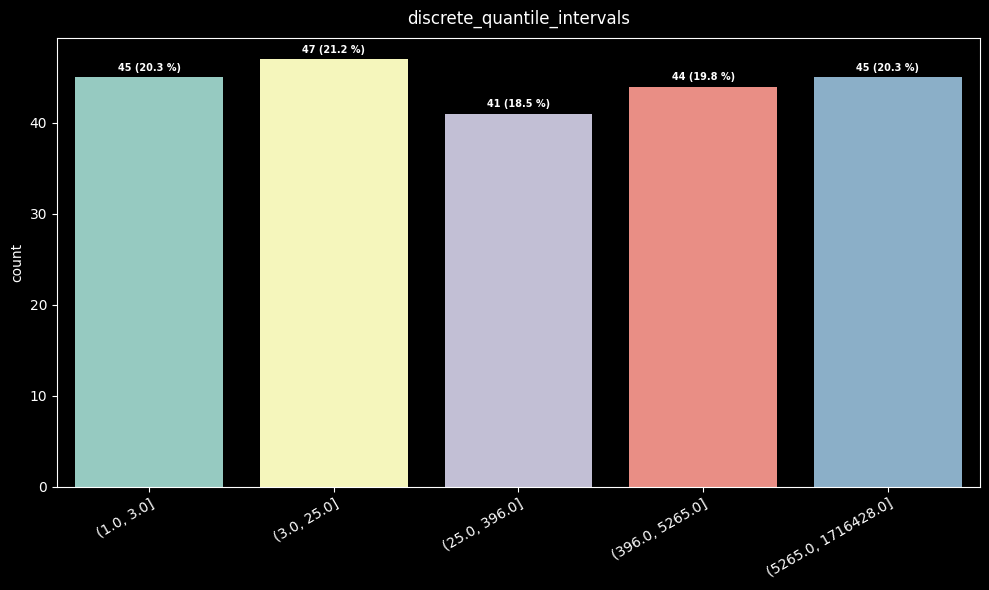

In [30]:
from pepper.plots import show_cat_mod_counts
import pandas as pd
n_bins = 5
q = pd.qcut(variables_.n_u, q=n_bins, precision=0, duplicates="drop").rename("variable modality counts")
show_cat_mod_counts(q.dropna())

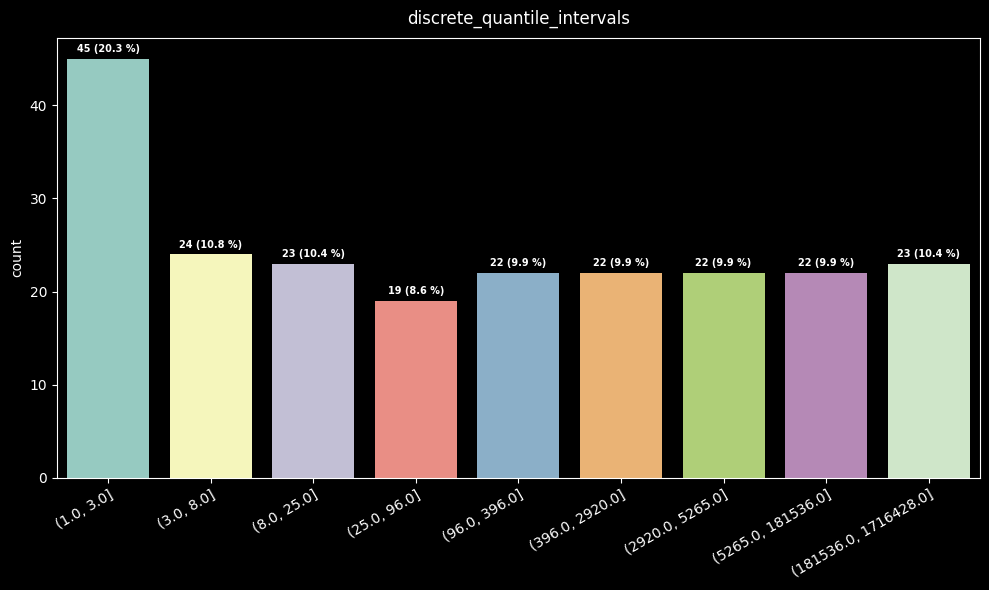

In [31]:
n_bins = 10
q = pd.qcut(variables_.n_u, q=n_bins, precision=0, duplicates="drop").rename("variable modality counts")
show_cat_mod_counts(q.dropna())

## 2.4. Primary Keys

Variables with a large number of modalities are primarily numerical.

Among them lies a special species that distinguishes itself as the relational link between tables in a multi-table dataset: these are the primary keys and their foreign counterparts. They naturally have a large number of modalities, particularly when they serve as a primary key, they have as many modalities as there are records: this is exactly what we expect from an identifier, its uniqueness.

These primary keys do not contain any useful information a priori other than relational information. However, the data hacker knows to be wary of this a priori: keys can hide relevant information, starting with temporal information. In relational database management systems (RDBMS), key values are typically incremented integers for each new record.

📌 The next notebook (in the order of the dataset processing pipeline) is `a_relational_schema.ipynb`, and it focuses on studying the relationships between the tables that make up the dataset.

### A priori keys

They are identified as a group of variables marked with the prefix `SK_`.

But be careful, there are false friends, like `SK_DPD`.

Concerning the acronym "SK", if the K obviously stands for Key, it is difficult to determine the meaning of the S, and frankly, it is not important.

In [44]:
sk_cols = variables_[variables_.col.str.startswith("SK_")]
sk_cols = sk_cols.sort_values(by=['col', 'Shannon entropy'], ascending=False)
display(sk_cols)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.0,1.000000,int64
57,pos_cash_balance,SK_ID_PREV,10001358,936325,0,1.0,0.093620,int64
88,installments_payments,SK_ID_PREV,13605401,997752,0,1.0,0.073335,int64
65,credit_card_balance,SK_ID_PREV,3840312,104307,0,1.0,0.027161,int64
96,application_train,SK_ID_CURR,307511,307511,0,1.0,1.000000,int64
1,previous_application,SK_ID_CURR,1670214,338857,0,1.0,0.202882,int64
37,bureau,SK_ID_CURR,1716428,305811,0,1.0,0.178167,int64
58,pos_cash_balance,SK_ID_CURR,10001358,337252,0,1.0,0.033721,int64
66,credit_card_balance,SK_ID_CURR,3840312,103558,0,1.0,0.026966,int64
89,installments_payments,SK_ID_CURR,13605401,339587,0,1.0,0.024960,int64


In [45]:
sk_names = sk_cols.col.unique()
print("Keys:", sk_names)

Keys: ['SK_ID_PREV' 'SK_ID_CURR' 'SK_ID_BUREAU' 'SK_DPD_DEF' 'SK_DPD']


In [49]:
descs = table_dict["columns_description"]
sk_descs = descs[descs.Column.isin(sk_names)]
display(sk_descs)

col_descs,Table,Column,Description,Special
col_id,,,,
1,application_{train|test},SK_ID_CURR,ID of loan in our sample,None
125,bureau,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,bureau,SK_ID_BUREAU,Recoded ID of previous Credit Bureau credit re...,hashed
142,bureau_balance,SK_ID_BUREAU,Recoded ID of Credit Bureau credit (unique cod...,hashed
145,pos_cash_balance,SK_ID_PREV,ID of previous credit in Home Credit related t...,None
146,pos_cash_balance,SK_ID_CURR,ID of loan in our sample,None
151,pos_cash_balance,SK_DPD,DPD (days past due) during the month of previo...,None
152,pos_cash_balance,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,None
153,credit_card_balance,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed


### Primary Keys

There are 3 primary keys in the dataset, characterized by a Shannon entropy value of 1:

In [50]:
pk_cols = variables_[variables_['Shannon entropy'] == 1.0]
display(pk_cols)

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.0,1.0,int64
38,bureau,SK_ID_BUREAU,1716428,1716428,0,1.0,1.0,int64
96,application_train,SK_ID_CURR,307511,307511,0,1.0,1.0,int64


## 2.5. Numeric variables with more than 100 modalities

There are 96 variables with more than 100 modalities that are not primary keys (not prefixed with `SK_ID`).

Among them, there are 15 integer variables and 81 floating-point variables. However, we should be cautious about pandas' type inference, as a single missing value is enough for an integer variable to be reclassified as a float. Using the `dropna` and `convert_dtypes` methods determines the true type.

On the other hand, we confirm that all the variables considered here are numeric.

In [63]:
num_vars = variables_[(variables_.n_u > 100) & ~variables_.col.str.startswith("SK_ID")]
display(num_vars["dtypes"].value_counts())

dtypes
float64    81
int64      15
Name: count, dtype: int64

In [64]:
display(num_vars[num_vars["dtypes"] == "int64"])

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
17,previous_application,DAYS_DECISION,1670214,2922,0,1.0,0.001749,int64
26,previous_application,SELLERPLACE_AREA,1670214,2097,0,1.0,0.001256,int64
41,bureau,DAYS_CREDIT,1716428,2923,0,1.0,0.001703,int64
42,bureau,CREDIT_DAY_OVERDUE,1716428,942,0,1.0,0.000549,int64
52,bureau,DAYS_CREDIT_UPDATE,1716428,2982,0,1.0,0.001737,int64
63,pos_cash_balance,SK_DPD,10001358,3400,0,1.0,0.000340,int64
64,pos_cash_balance,SK_DPD_DEF,10001358,2307,0,1.0,0.000231,int64
69,credit_card_balance,AMT_CREDIT_LIMIT_ACTUAL,3840312,181,0,1.0,0.000047,int64
81,credit_card_balance,CNT_DRAWINGS_CURRENT,3840312,129,0,1.0,0.000034,int64
86,credit_card_balance,SK_DPD,3840312,917,0,1.0,0.000239,int64


In [65]:
display(num_vars[num_vars["dtypes"] == "float64"])

,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
3,previous_application,AMT_ANNUITY,1297979,357959,372235,0.777133,0.275782,float64
4,previous_application,AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
5,previous_application,AMT_CREDIT,1670213,86803,1,0.999999,0.051971,float64
6,previous_application,AMT_DOWN_PAYMENT,774370,29278,895844,0.463635,0.037809,float64
7,previous_application,AMT_GOODS_PRICE,1284699,93885,385515,0.769182,0.073079,float64
...,...,...,...,...,...,...,...,...
179,application_train,LIVINGAREA_MEDI,153161,5281,154350,0.498067,0.034480,float64
180,application_train,NONLIVINGAPARTMENTS_MEDI,93997,214,213514,0.305670,0.002277,float64
181,application_train,NONLIVINGAREA_MEDI,137829,3323,169682,0.448208,0.024110,float64
184,application_train,TOTALAREA_MODE,159080,5116,148431,0.517315,0.032160,float64


# 3\. Nature of Data: Business Types

After focusing on technical types, we now turn our attention to business types (e.g., flag, amount, etc.). Some of these types are closely related to technical types, such as durations in days.

Our main indicators here are the variable names, constructed based on semantic markers, including prefixes (but suffixes and infixes are also informative). For the interpretation of markers that are abbreviations, we refer to the description (`columns_description`).

These business types allow us to initiate a business-oriented grouping of variables and identify coherent blocks (families of variables).

Note: The same variable (same name) can be used in multiple tables, not only as primary or foreign keys. For example, the tables `application` and `previous_application` have many common features regarding loan applicants.

## About variable type categories

By understanding the nature of different variable types, we can appropriately analyze and interpret the data, choose suitable visualizations, and apply appropriate statistical techniques in our analysis.

### Categorical variables

**Categorical variables**, also known as _qualitative variables_, represent data that can be divided into categories or groups. They do not have an inherent numerical value and are used to represent characteristics or attributes. Categorical variables can be further divided into **nominal variables** and **ordinal variables**.

1. **Nominal variables**: Nominal variables represent categories that have no inherent order or ranking. Examples of nominal variables include gender (male, female), color (red, blue, green), and country (USA, Canada, Australia).

2. **Ordinal variables**: Ordinal variables represent categories with a natural order or ranking. The categories have a relative position or hierarchy. Examples of ordinal variables include education level (high school, bachelor's degree, master's degree), satisfaction rating (low, medium, high), and income level (low, medium, high).

Categorical variables are typically represented using labels or codes instead of numerical values. They require special encoding techniques, such as one-hot encoding or label encoding, before they can be used in certain machine learning algorithms.

### Numerical variables

**Numerical variables**, also known as _quantitative variables_ represent data that can be measured or quantified. They can be measured on a continuous or discrete scale and be further classified into **continuous variables** and **discrete variables**.

1. **Continuous variables**: Continuous variables represent quantities that can take any value within a specific range or interval. They are measured on a continuous scale and can have decimal values. Examples of continuous variables include age, height, weight, and income. Continuous variables allow for precise measurements and can be further analyzed using statistical techniques such as mean, standard deviation, and correlation. Examples of continuous variables include age, height, weight, and income.

2. **Discrete variables**: Discrete variables represent whole numbers or counts that are typically obtained by counting or enumerating, that can only take on specific, separate values, and cannot be divided into smaller units. They often represent counts or whole numbers. Examples of discrete variables include the number of siblings, the number of cars owned, and the number of customer complaints.They can be further categorized into **ordinal variables** and **cardinal variables**.
 
   - **Ordinal variables**: Ordinal variables represent categories with a natural order or ranking. The categories have a relative position or hierarchy. Examples of ordinal variables include ratings (e.g., satisfaction rating from 1 to 5), educational levels (e.g., high school, bachelor's degree, master's degree), and performance levels (e.g., low, medium, high).

   - **Cardinal variables**: Cardinal variables, also known as **count variables**, represent quantities that are whole numbers without a natural order or ranking. They typically represent counts or frequencies of occurrences. Examples of cardinal variables include the number of siblings, the number of purchases, and the number of defects. Cardinal variables are often analyzed using summary statistics such as counts, frequencies, and proportions.

Numerical variables provide valuable quantitative information and are often used in various statistical analyses and modeling techniques. Understanding whether a numerical variable is continuous or discrete, and if discrete, whether it is ordinal or cardinal, helps determine the appropriate statistical methods and visualizations for analyzing the data.

Numerical variables can be further analyzed using statistical measures such as mean, median, standard deviation, and correlation coefficients. They can be used in various mathematical operations and are suitable for many statistical and machine learning techniques.

Note that some numerical variables can be treated as categorical variables depending on their nature and usage in the analysis. For example, if a variable represents different categories or groups, even though it is stored as a numerical value, it can be treated as a categorical variable.

## Nominal Variables

### `NAME_*`: 19 (15) Nominal Variables

There are 19 (15 distinct) categorical variables, primarily distributed between the `application` and `previous_application` tables (except for `NAME_CONTRACT_STATUS`, which is shared by the `pos_cash_balance` and `credit_card_balance` tables).

They all have fewer than 30 categories.

It is also worth noting that the majority of these variables have a fill rate of 100%, except for the variable `NAME_TYPE_SUITE`, which appears in both tables with a fill rate of around 50% in `previous_application` and nearly 100% in `application`.

In [8]:
name_cols = variables_[variables_.col.str.startswith("NAME_")]
print(f"n_NAME_cols: {name_cols.shape[0]}")
display(name_cols)

n_NAME_cols: 19


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
15,previous_application,NAME_CASH_LOAN_PURPOSE,1670214,25,0,1.000000,1.496814e-05,object
16,previous_application,NAME_CONTRACT_STATUS,1670214,4,0,1.000000,2.394903e-06,object
18,previous_application,NAME_PAYMENT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
20,previous_application,NAME_TYPE_SUITE,849809,7,820405,0.508802,8.237145e-06,object
21,previous_application,NAME_CLIENT_TYPE,1670214,4,0,1.000000,2.394903e-06,object
22,previous_application,NAME_GOODS_CATEGORY,1670214,28,0,1.000000,1.676432e-05,object
23,previous_application,NAME_PORTFOLIO,1670214,5,0,1.000000,2.993628e-06,object
24,previous_application,NAME_PRODUCT_TYPE,1670214,3,0,1.000000,1.796177e-06,object
27,previous_application,NAME_SELLER_INDUSTRY,1670214,11,0,1.000000,6.585982e-06,object


In [9]:
from home_credit.utils import help_cols
name_names = name_cols.col.unique()
print(f"NAME_cols ({len(name_names)}): {name_names}")
help_cols(name_names)

NAME_cols (15): ['NAME_CONTRACT_TYPE' 'NAME_CASH_LOAN_PURPOSE' 'NAME_CONTRACT_STATUS'
 'NAME_PAYMENT_TYPE' 'NAME_TYPE_SUITE' 'NAME_CLIENT_TYPE'
 'NAME_GOODS_CATEGORY' 'NAME_PORTFOLIO' 'NAME_PRODUCT_TYPE'
 'NAME_SELLER_INDUSTRY' 'NAME_YIELD_GROUP' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
|application_{train\|test}|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|_|
|application_{train\|test}|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,�)|_|
|application_{train\|test}|NAME_EDUCATION_TYPE|Level of highest education the client achieved|_|
|application_{train\|test}|NAME_FAMILY_STATUS|Family status of the client|_|
|application_{train\|test}|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|_|
|pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
|credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
|previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
|previous_application|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|_|
|previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|
|previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
|previous_application|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|_|
|previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
|previous_application|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|_|
|previous_application|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, �|_|
|previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
|previous_application|NAME_SELLER_INDUSTRY|The industry of the seller|_|
|previous_application|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped|

### `*_TYPE`: 12 (11) Nominal Variables

These variables are primarily distributed across the `application` and `previous_application` tables, with only `CREDIT_TYPE` associated with the `bureau` table.

Please note that the suffix `_TYPE` overlaps with the prefix `NAME_`: 8 out of the 12 variables have already been captured by the `NAME_*` group. 4 variables do not have the `NAME` prefix: `CHANNEL_TYPE`, `CREDIT_TYPE`, `OCCUPATION_TYPE`, `ORGANIZATION_TYPE`.

The variable `NAME_CONTRACT_TYPE` is present in both the `application` and `previous_application` tables.

Only the `OCCUPATION_TYPE` variable has missing values (with a fill rate of 69%), but this should be considered in light of the possibility of encoding missing values with a specific code for other variables.

In [ ]:
type_cols = variables_[variables_.col.str.endswith("_TYPE")]
print(f"n_TYPE_cols: {type_cols.shape[0]}")
display(type_cols)

n_TYPE_cols: 12


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
2,previous_application,NAME_CONTRACT_TYPE,1670214,4,0,1.000000,0.000002,object
18,previous_application,NAME_PAYMENT_TYPE,1670214,4,0,1.000000,0.000002,object
21,previous_application,NAME_CLIENT_TYPE,1670214,4,0,1.000000,0.000002,object
24,previous_application,NAME_PRODUCT_TYPE,1670214,3,0,1.000000,0.000002,object
25,previous_application,CHANNEL_TYPE,1670214,8,0,1.000000,0.000005,object
51,bureau,CREDIT_TYPE,1716428,15,0,1.000000,0.000009,object
98,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
108,application_train,NAME_INCOME_TYPE,307511,8,0,1.000000,0.000026,object
109,application_train,NAME_EDUCATION_TYPE,307511,5,0,1.000000,0.000016,object
111,application_train,NAME_HOUSING_TYPE,307511,6,0,1.000000,0.000020,object


In [ ]:
type_names = type_cols.col.unique()
print(f"TYPE_cols ({len(type_names)}): {type_names}")
help_cols(type_names)

TYPE_cols (11): ['NAME_CONTRACT_TYPE' 'NAME_PAYMENT_TYPE' 'NAME_CLIENT_TYPE'
 'NAME_PRODUCT_TYPE' 'CHANNEL_TYPE' 'CREDIT_TYPE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_HOUSING_TYPE' 'OCCUPATION_TYPE'
 'ORGANIZATION_TYPE']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|_|
|application_{train\|test}|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,�)|_|
|application_{train\|test}|NAME_EDUCATION_TYPE|Level of highest education the client achieved|_|
|application_{train\|test}|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|_|
|application_{train\|test}|OCCUPATION_TYPE|What kind of occupation does the client have|_|
|application_{train\|test}|ORGANIZATION_TYPE|Type of organization where client works|_|
|bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|
|previous_application|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|_|
|previous_application|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|_|
|previous_application|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|_|
|previous_application|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|_|
|previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|

### `CHANNEL_*`: 1 Nominal Variable

The variable `CHANNEL_TYPE` represents the distribution channel through which the loan applicant client was acquired. It is peculiar that this variable is only present in the `previous_application` table and not in the `application` table. The variable has a fill rate of 100% and describes 8 possible channels.

In [ ]:
channel_cols = variables_[variables_.col.str.startswith("CHANNEL_")]
print(f"n_CHANNEL_cols: {channel_cols.shape[0]}")
display(channel_cols)

n_CHANNEL_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
25,previous_application,CHANNEL_TYPE,1670214,8,0,1.000,0.000,object


In [ ]:
channel_names = channel_cols.col.unique()
print(f"CHANNEL_cols ({len(channel_names)}): {channel_names}")
help_cols(channel_names)

CHANNEL_cols (1): ['CHANNEL_TYPE']


|Table|Column|Description|Special|
|-|-|-|-|
|previous_application|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|_|

In [ ]:
from home_credit.load import load_raw_table
table_name = "previous_application"
table = load_raw_table(table_name)
display(table.CHANNEL_TYPE.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


CHANNEL_TYPE
Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: count, dtype: int64

### `CREDIT_*`: 3 Nominal Variables

These 3 nominal variables from the `bureau` table provide important details related to the loan: the current **status** of the loan, the **currency**, and the credit purpose (**credit type**). The fill rate is 100%, and they have respective numbers of categories of 4, 4, and 15 (without missing values encoded with a special code).

**Note:** The variable `CREDIT_DAY_OVERDUE` is a false friend and should have been named `DAYS_CREDIT_OVERDUE` following conventions. Therefore, it is not included in the `CREDIT_*` family.

In [15]:
credit_cols = variables_[
    variables_.col.str.startswith("CREDIT_")
    & (variables_.col != "CREDIT_DAY_OVERDUE")
]
print(f"n_CREDIT_cols: {credit_cols.shape[0]}")
display(credit_cols)

n_CREDIT_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
39,bureau,CREDIT_ACTIVE,1716428,4,0,1.0,0.000002,object
40,bureau,CREDIT_CURRENCY,1716428,4,0,1.0,0.000002,object
51,bureau,CREDIT_TYPE,1716428,15,0,1.0,0.000009,object


In [16]:
credit_names = credit_cols.col.unique()
print(f"CREDIT_cols ({len(credit_names)}): {credit_names}")
help_cols(credit_names)

CREDIT_cols (3): ['CREDIT_ACTIVE' 'CREDIT_CURRENCY' 'CREDIT_TYPE']


|Table|Column|Description|Special|
|-|-|-|-|
|bureau|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|_|
|bureau|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded|
|bureau|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|_|

In [ ]:
from home_credit.load import load_raw_table
table_name = "bureau"
table = load_raw_table(table_name)
display(table.CREDIT_ACTIVE.value_counts())
display(table.CREDIT_CURRENCY.value_counts())
display(table.CREDIT_TYPE.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau.pqt


CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

### `CODE_*` 2 Nominal Variables

There are 2 categorical variables, `application`.`CODE_GENDER` and `previous_application`.`CODE_REJECT_REASON`. They all have fewer than 10 categories. These variables have a fill rate of 100%.

They are of the same nature as the `NAME_*` variables, but their values are acronyms, some of which are difficult to interpret without explicit documentation. It is worth noting the presence of the value `XNA`, which likely encodes missing values, explaining the fill rate of 100%.

In [ ]:
code_cols = variables_[variables_.col.str.startswith("CODE_")]
print(f"n_CODE_cols: {code_cols.shape[0]}")
display(code_cols)

n_CODE_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
19,previous_application,CODE_REJECT_REASON,1670214,9,0,1.000,0.000,object
99,application_train,CODE_GENDER,307511,3,0,1.000,0.000,object


In [ ]:
code_names = code_cols.col.unique()
print(f"CODE_cols ({len(code_names)}):", code_names)
help_cols(code_names)

CODE_cols (2): ['CODE_REJECT_REASON' 'CODE_GENDER']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|CODE_GENDER|Gender of the client|_|
|previous_application|CODE_REJECT_REASON|Why was the previous application rejected|_|

In [ ]:
from home_credit.load import get_application, get_previous_application
display(get_application().CODE_GENDER.unique())
display(get_previous_application().CODE_REJECT_REASON.unique())

array(['M', 'F', 'XNA'], dtype=object)

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

### `STATUS`: 1 Categorical Variable (Ordinal & Nominal)

The categorical variable `bureau_balance.STATUS` is a hybrid indicator:
- It is both cardinal and ordinal when it associates codes 0 to 5 with different payment delay ranges (in intervals of 30 days of DPD, or in other words, the integer division of the payment delay by 30).
- However, it is nominal when it takes one of the three values 'C' (closed loan), 'X' (missing value).

It would be relevant, in order to provide cardinal numerical information to the models being trained, to separate this variable into two variables. One variable would be nominal, indicating whether the loan is closed or ongoing, and the other variable would be cardinal, indicating the number of months of delay.

When we discuss data preparation for modeling and model training, we will compare the performance obtained with a simple one-hot encoding to the performance obtained with this separation. This separation strategy is an additional parameter for data preparation, complementary to the hyperparameters of the modeling process.

In [ ]:
status_cols = variables_[variables_.col.str.startswith("STATUS")]
print(f"n_STATUS_cols: {status_cols.shape[0]}")
display(status_cols)

n_STATUS_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
56,bureau_balance,STATUS,27299925,8,0,1.000,0.000,object


In [ ]:
status_names = status_cols.col.unique()
print(f"STATUS_cols ({len(status_names)}): {status_names}")
help_cols(status_names)

STATUS_cols (1): ['STATUS']


|Table|Column|Description|Special|
|-|-|-|-|
|bureau_balance|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )|_|

In [ ]:
from home_credit.load import load_raw_table
table_name = "bureau_balance"
table = load_raw_table(table_name)
display(table.STATUS.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\bureau_balance.pqt


STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

### `PRODUCT_*`: 1 Categorical Variable

The variable `previous_application`.`PRODUCT_COMBINATION` allows us to divide previously granted loan offers into 17 classes. These classes represent combinations of the three main nominal categories: `Cash`, `POS`, and `Card`, along with specific subcategories at one or two levels of hierarchy. These subcategories can be nominal (e.g., `(Card, Street), (Card, X-Sell)`) or ordinal (e.g., `(Cash, X-Sell, low), (Cash, X-Sell, middle), (Cash, X-Sell, high)`).

The fill rate is almost 100%, with only 346 missing values out of 1.67 million records.

🧱 **Feature engineering**: When hierarchically composed classes generate semi-structured labels, it can be interesting to parse and decompose them into multiple variables. As always, it's important to compare the approach with and without this feature engineering operation, making it configurable.

In [ ]:
product_cols = variables_[variables_.col.str.startswith("PRODUCT_")]
print(f"n_PRODUCT_cols: {product_cols.shape[0]}")
display(product_cols)

n_product_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
30,previous_application,PRODUCT_COMBINATION,1669868,17,346,0.999793,0.00001,object


In [ ]:
product_names = product_cols.col.unique()
print(f"PRODUCT_cols ({len(product_names)}): {product_names}")
help_cols(product_names)

PRODUCT_cols: ['PRODUCT_COMBINATION']


Table|Column|Description|Special|
---|---|---|---|
previous_application|PRODUCT_COMBINATION|Detailed product combination of the previous application|_|

In [ ]:
from home_credit.load import load_raw_table
table_name = "previous_application"
table = load_raw_table(table_name)
display(table.PRODUCT_COMBINATION.value_counts())

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt


PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

## 37 Binary (Categorical) Variables

### `FLAG_*`: 29 Binary Variables

These 29 variables represent binary features about the loan applicants (e.g., whether they own a car or have provided their phone number). Two-thirds of these variables indicate the availability or provision of 20 required documents for the loan application. Each of these variables has a fill rate of 100%.

Note: We have previously discussed the `FLAG_DOCUMENT` variables and determined that they are constant, only in `application_test`.

In [ ]:
flag_cols = variables_[variables_.col.str.startswith("FLAG_")]
print(f"n_FLAG_cols: {flag_cols.shape[0]}")
display(flag_cols)

n_FLAG_cols: 29


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
10,previous_application,FLAG_LAST_APPL_PER_CONTRACT,1670214,2,0,1.000,0.000,object
100,application_train,FLAG_OWN_CAR,307511,2,0,1.000,0.000,object
101,application_train,FLAG_OWN_REALTY,307511,2,0,1.000,0.000,object
118,application_train,FLAG_MOBIL,307511,2,0,1.000,0.000,int64
119,application_train,FLAG_EMP_PHONE,307511,2,0,1.000,0.000,int64
120,application_train,FLAG_WORK_PHONE,307511,2,0,1.000,0.000,int64
121,application_train,FLAG_CONT_MOBILE,307511,2,0,1.000,0.000,int64
122,application_train,FLAG_PHONE,307511,2,0,1.000,0.000,int64
123,application_train,FLAG_EMAIL,307511,2,0,1.000,0.000,int64
192,application_train,FLAG_DOCUMENT_2,307511,2,0,1.000,0.000,int64


In [ ]:
flag_names = flag_cols.col.unique()
print(f"FLAG_cols ({len(flag_names)}): {flag_names}")
help_cols(flag_names)

FLAG_cols (29): ['FLAG_LAST_APPL_PER_CONTRACT' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3'
 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7'
 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_9' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'
 'FLAG_DOCUMENT_12' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'
 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'
 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'
 'FLAG_DOCUMENT_21']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|FLAG_OWN_CAR|Flag if the client owns a car|_|
|application_{train\|test}|FLAG_OWN_REALTY|Flag if client owns a house or flat|_|
|application_{train\|test}|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|_|
|application_{train\|test}|FLAG_DOCUMENT_2|Did client provide document 2|_|
|application_{train\|test}|FLAG_DOCUMENT_3|Did client provide document 3|_|
|application_{train\|test}|FLAG_DOCUMENT_4|Did client provide document 4|_|
|application_{train\|test}|FLAG_DOCUMENT_5|Did client provide document 5|_|
|application_{train\|test}|FLAG_DOCUMENT_6|Did client provide document 6|_|
|application_{train\|test}|FLAG_DOCUMENT_7|Did client provide document 7|_|
|application_{train\|test}|FLAG_DOCUMENT_8|Did client provide document 8|_|
|application_{train\|test}|FLAG_DOCUMENT_9|Did client provide document 9|_|
|application_{train\|test}|FLAG_DOCUMENT_10|Did client provide document 10|_|
|application_{train\|test}|FLAG_DOCUMENT_11|Did client provide document 11|_|
|application_{train\|test}|FLAG_DOCUMENT_12|Did client provide document 12|_|
|application_{train\|test}|FLAG_DOCUMENT_13|Did client provide document 13|_|
|application_{train\|test}|FLAG_DOCUMENT_14|Did client provide document 14|_|
|application_{train\|test}|FLAG_DOCUMENT_15|Did client provide document 15|_|
|application_{train\|test}|FLAG_DOCUMENT_16|Did client provide document 16|_|
|application_{train\|test}|FLAG_DOCUMENT_17|Did client provide document 17|_|
|application_{train\|test}|FLAG_DOCUMENT_18|Did client provide document 18|_|
|application_{train\|test}|FLAG_DOCUMENT_19|Did client provide document 19|_|
|application_{train\|test}|FLAG_DOCUMENT_20|Did client provide document 20|_|
|application_{train\|test}|FLAG_DOCUMENT_21|Did client provide document 21|_|
|previous_application|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|_|

### `NFLAG_*`: 2 Binary Variables

These two variables from `previous_application` are of the same nature as the `FLAG_*` variables mentioned earlier. The prefix "N" seems to indicate that they are digitized categories, but this is also true for the majority of `FLAG_*` variables. The fill rate is 100% for `NFLAG_LAST_APPL_IN_DAY` and 60% for `NFLAG_INSURED_ON_APPROVAL`.

In [ ]:
nflag_cols = variables_[variables_.col.str.startswith("NFLAG_")]
print(f"n_NFLAG_cols: {nflag_cols.shape[0]}")
display(nflag_cols)

n_NFLAG_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
11,previous_application,NFLAG_LAST_APPL_IN_DAY,1670214,2,0,1.000,0.000,int64
36,previous_application,NFLAG_INSURED_ON_APPROVAL,997149,2,673065,0.597,0.000,float64


In [ ]:
nflag_names = nflag_cols.col.unique()
print(f"NFLAG_cols ({len(nflag_names)}):", nflag_names)
help_cols(nflag_names)

NFLAG_cols (2): ['NFLAG_LAST_APPL_IN_DAY' 'NFLAG_INSURED_ON_APPROVAL']


|Table|Column|Description|Special|
|-|-|-|-|
|previous_application|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|_|
|previous_application|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|_|

In [ ]:
from home_credit.load import get_previous_application
table = get_previous_application()
display(table.NFLAG_LAST_APPL_IN_DAY.value_counts())
display(table.NFLAG_INSURED_ON_APPROVAL.value_counts())

NFLAG_LAST_APPL_IN_DAY
1    1664314
0       5900
Name: count, dtype: int64

NFLAG_INSURED_ON_APPROVAL
0.000    665527
1.000    331622
Name: count, dtype: int64

### `*_REGION_*`: 3 Binary Variables

These 3 variables of `FLAG` type, although they don't have the prefix, are derived from the comparison of 3 addresses provided by the client, focusing on the regional level (thus abstracting from the specific address).
Note that the concept of "region" is not clearly defined.

The 3 addresses that locate the client are:
- `REG_REGION`: region associated with the client's permanent address.
- `LIVE_REGION`: region associated with the client's contact address.
- `WORK_REGION`: region associated with the client's work address.

These 3 variables determine the identity or difference between these regions.

The fill rate is 100%.

🔬📊 During exploratory analysis, it will be interesting to quantify the impact on the `TARGET` variable based on the 8 possible value classes of these 3 variables.

In [14]:
_region_cols = variables_[variables_.col.str.contains("_REGION_")]
print(f"n__REGION_cols: {_region_cols.shape[0]}")
display(_region_cols)

n__REGION_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
130,application_train,REG_REGION_NOT_LIVE_REGION,307511,2,0,1.0,0.000007,int64
131,application_train,REG_REGION_NOT_WORK_REGION,307511,2,0,1.0,0.000007,int64
132,application_train,LIVE_REGION_NOT_WORK_REGION,307511,2,0,1.0,0.000007,int64


In [9]:
_region_names = _region_cols.col.unique()
print(f"_REGION_cols ({len(_region_names)}): {_region_names}")
help_cols(_region_names)

_REGION_cols (3): ['REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|_|
|application_{train\|test}|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|_|
|application_{train\|test}|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|_|

### `*_CITY_*`: 3 Binary Variables

The same principle applies as with the previous `_REGION_` variables.

These 3 variables of `FLAG` type, although they don't have the prefix, are derived from the comparison of 3 addresses provided by the client, focusing on the city level (thus abstracting from the specific address).

Note that the concept of "city" (similarly to the region) is not clearly defined and does not refer to an explicit reference.

The 3 addresses that locate the client are:
- `REG_CITY`: city associated with the client's permanent address.
- `LIVE_CITY`: city associated with the client's contact address.
- `WORK_CITY`: city associated with the client's work address.

These 3 variables determine the identity or difference between these cities.

The fill rate is 100%.

🔬📊 During exploratory analysis, it will be interesting to quantify the impact on the `TARGET` variable based on the 8 possible value classes of these 3 variables.

In [11]:
city_cols = variables_[variables_.col.str.contains("_CITY_")]
print(f"n_CITY_cols: {city_cols.shape[0]}")
display(city_cols)

n_CITY_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
133,application_train,REG_CITY_NOT_LIVE_CITY,307511,2,0,1.0,0.000007,int64
134,application_train,REG_CITY_NOT_WORK_CITY,307511,2,0,1.0,0.000007,int64
135,application_train,LIVE_CITY_NOT_WORK_CITY,307511,2,0,1.0,0.000007,int64


In [12]:
city_names = city_cols.col.unique()
print(f"CITY_cols ({len(city_names)}): {city_names}")
help_cols(city_names)

CITY_cols (3): ['REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|_|
|application_{train\|test}|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|_|
|application_{train\|test}|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|_|

## Numerical Variables

### `AMT_*`: 35 (31) Continuous Variables

These 35 (31 distinct) variables represent financial amounts, mostly in a single currency, although it is not specified in the dataset documentation. They are present in 5 tables, including the main ones.

In [5]:
amt_cols = variables_[variables_.col.str.startswith("AMT_")]
print(f"n_AMT_cols: {amt_cols.shape[0]}")
display(amt_cols)

n_AMT_cols: 35


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
3,previous_application,AMT_ANNUITY,1297979,357959,372235,0.777133,0.275782,float64
4,previous_application,AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
5,previous_application,AMT_CREDIT,1670213,86803,1,0.999999,0.051971,float64
6,previous_application,AMT_DOWN_PAYMENT,774370,29278,895844,0.463635,0.037809,float64
7,previous_application,AMT_GOODS_PRICE,1284699,93885,385515,0.769182,0.073079,float64
45,bureau,AMT_CREDIT_MAX_OVERDUE,591940,68251,1124488,0.344867,0.115301,float64
47,bureau,AMT_CREDIT_SUM,1716415,236708,13,0.999992,0.137908,float64
48,bureau,AMT_CREDIT_SUM_DEBT,1458759,226537,257669,0.849881,0.155294,float64
49,bureau,AMT_CREDIT_SUM_LIMIT,1124648,51726,591780,0.655226,0.045993,float64
50,bureau,AMT_CREDIT_SUM_OVERDUE,1716428,1616,0,1.000000,0.000941,float64


In [6]:
amt_names = amt_cols.col.unique()
print(f"AMT_cols ({len(amt_names)}): {amt_names}")

AMT_cols (31): ['AMT_ANNUITY' 'AMT_APPLICATION' 'AMT_CREDIT' 'AMT_DOWN_PAYMENT'
 'AMT_GOODS_PRICE' 'AMT_CREDIT_MAX_OVERDUE' 'AMT_CREDIT_SUM'
 'AMT_CREDIT_SUM_DEBT' 'AMT_CREDIT_SUM_LIMIT' 'AMT_CREDIT_SUM_OVERDUE'
 'AMT_BALANCE' 'AMT_CREDIT_LIMIT_ACTUAL' 'AMT_DRAWINGS_ATM_CURRENT'
 'AMT_DRAWINGS_CURRENT' 'AMT_DRAWINGS_OTHER_CURRENT'
 'AMT_DRAWINGS_POS_CURRENT' 'AMT_INST_MIN_REGULARITY'
 'AMT_PAYMENT_CURRENT' 'AMT_PAYMENT_TOTAL_CURRENT'
 'AMT_RECEIVABLE_PRINCIPAL' 'AMT_RECIVABLE' 'AMT_TOTAL_RECEIVABLE'
 'AMT_INSTALMENT' 'AMT_PAYMENT' 'AMT_INCOME_TOTAL'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT' 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [9]:
help_cols(amt_names)

|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|AMT_INCOME_TOTAL|Income of the client|_|
|application_{train\|test}|AMT_CREDIT|Credit amount of the loan|_|
|application_{train\|test}|AMT_ANNUITY|Loan annuity|_|
|application_{train\|test}|AMT_GOODS_PRICE|For consumer loans it is the price of the goods for which the loan is given|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|
|application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|
|bureau|AMT_CREDIT_MAX_OVERDUE|Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)|_|
|bureau|AMT_CREDIT_SUM|Current credit amount for the Credit Bureau credit|_|
|bureau|AMT_CREDIT_SUM_DEBT|Current debt on Credit Bureau credit|_|
|bureau|AMT_CREDIT_SUM_LIMIT|Current credit limit of credit card reported in Credit Bureau|_|
|bureau|AMT_CREDIT_SUM_OVERDUE|Current amount overdue on Credit Bureau credit|_|
|bureau|AMT_ANNUITY|Annuity of the Credit Bureau credit|_|
|credit_card_balance|AMT_BALANCE|Balance during the month of previous credit|_|
|credit_card_balance|AMT_CREDIT_LIMIT_ACTUAL|Credit card limit during the month of the previous credit|_|
|credit_card_balance|AMT_DRAWINGS_ATM_CURRENT|Amount drawing at ATM during the month of the previous credit|_|
|credit_card_balance|AMT_DRAWINGS_CURRENT|Amount drawing during the month of the previous credit|_|
|credit_card_balance|AMT_DRAWINGS_OTHER_CURRENT|Amount of other drawings during the month of the previous credit|_|
|credit_card_balance|AMT_DRAWINGS_POS_CURRENT|Amount drawing or buying goods during the month of the previous credit|_|
|credit_card_balance|AMT_INST_MIN_REGULARITY|Minimal installment for this month of the previous credit|_|
|credit_card_balance|AMT_PAYMENT_CURRENT|How much did the client pay during the month on the previous credit|_|
|credit_card_balance|AMT_PAYMENT_TOTAL_CURRENT|How much did the client pay during the month in total on the previous credit|_|
|credit_card_balance|AMT_RECEIVABLE_PRINCIPAL|Amount receivable for principal on the previous credit|_|
|credit_card_balance|AMT_RECIVABLE|Amount receivable on the previous credit|_|
|credit_card_balance|AMT_TOTAL_RECEIVABLE|Total amount receivable on the previous credit|_|
|previous_application|AMT_ANNUITY|Annuity of previous application|_|
|previous_application|AMT_APPLICATION|For how much credit did client ask on the previous application|_|
|previous_application|AMT_CREDIT|Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT|_|
|previous_application|AMT_DOWN_PAYMENT|Down payment on the previous application|_|
|previous_application|AMT_GOODS_PRICE|Goods price of good that client asked for (if applicable) on the previous application|_|
|installments_payments|AMT_INSTALMENT|What was the prescribed installment amount of previous credit on this installment|_|
|installments_payments|AMT_PAYMENT|What the client actually paid on previous credit on this installment|_|

### `CNT_*`: 11 Discrete Cardinal Variables 

There are 11 count variables (cardinal features, hence integers) spread across 5 tables, including the main tables. 3 of them have no missing values (and were inferred as `int64`), and 8 have a fill rate ranging from 0.777 to 0.997 (and were inferred as `float64`). Most of them represent integer measurements related to the credit lifecycle, and 3 are social metrics of the loan applicant (number of family members and number of children).

In [11]:
cnt_cols = variables_[variables_.col.str.startswith("CNT_")]
print(f"n_CNT_cols : {cnt_cols.shape[0]}")
display(cnt_cols)

n_CNT_cols : 11


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
28,previous_application,CNT_PAYMENT,1297984,49,372230,0.777136,0.000038,float64
46,bureau,CNT_CREDIT_PROLONG,1716428,10,0,1.000000,0.000006,int64
60,pos_cash_balance,CNT_INSTALMENT,9975287,73,26071,0.997393,0.000007,float64
61,pos_cash_balance,CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997392,0.000008,float64
80,credit_card_balance,CNT_DRAWINGS_ATM_CURRENT,3090496,44,749816,0.804751,0.000014,float64
81,credit_card_balance,CNT_DRAWINGS_CURRENT,3840312,129,0,1.000000,0.000034,int64
82,credit_card_balance,CNT_DRAWINGS_OTHER_CURRENT,3090496,11,749816,0.804751,0.000004,float64
83,credit_card_balance,CNT_DRAWINGS_POS_CURRENT,3090496,133,749816,0.804751,0.000043,float64
84,credit_card_balance,CNT_INSTALMENT_MATURE_CUM,3535076,121,305236,0.920518,0.000034,float64
102,application_train,CNT_CHILDREN,307511,15,0,1.000000,0.000049,int64


In [12]:
cnt_names = cnt_cols.col.unique()
print(f"CNT_cols ({len(cnt_names)}):", cnt_names)
help_cols(cnt_names)

CNT_cols (11): ['CNT_PAYMENT' 'CNT_CREDIT_PROLONG' 'CNT_INSTALMENT'
 'CNT_INSTALMENT_FUTURE' 'CNT_DRAWINGS_ATM_CURRENT' 'CNT_DRAWINGS_CURRENT'
 'CNT_DRAWINGS_OTHER_CURRENT' 'CNT_DRAWINGS_POS_CURRENT'
 'CNT_INSTALMENT_MATURE_CUM' 'CNT_CHILDREN' 'CNT_FAM_MEMBERS']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|CNT_CHILDREN|Number of children the client has|_|
|application_{train\|test}|CNT_FAM_MEMBERS|How many family members does client have|_|
|bureau|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|_|
|pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
|pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|
|credit_card_balance|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|_|
|credit_card_balance|CNT_DRAWINGS_CURRENT|Number of drawings during this month on the previous credit|_|
|credit_card_balance|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|_|
|credit_card_balance|CNT_DRAWINGS_POS_CURRENT|Number of drawings for goods during this month on the previous credit|_|
|credit_card_balance|CNT_INSTALMENT_MATURE_CUM|Number of paid installments on the previous credit|_|
|previous_application|CNT_PAYMENT|Term of previous credit at application of the previous application|_|

📌 We are using `dropna` and `convert_dtypes` together here, as mentioned earlier, to verify that, disregarding missing values, our variables are indeed integers. We can observe this.

In [14]:
import pandas as pd
from home_credit.load import get_credit_card_balance
from home_credit.nb_macros import get_datablock
data = get_credit_card_balance()
data_block = get_datablock(data, "CNT")

# Convert dtypes with dropna and create a list of converted dtypes
true_dtypes = [
    series.dropna().convert_dtypes().dtype
    for _, series in data_block.items()
]

# Create a DataFrame with `default_dtype` and `true_dtype` columns
db_dtypes = pd.DataFrame({
    'default_dtype': data_block.dtypes,
    'true_dtype': true_dtypes
})

# Display the DataFrame
print(db_dtypes)

                           default_dtype true_dtype
RAW_CREDIT_CARD_BALANCE                            
CNT_DRAWINGS_ATM_CURRENT         float64      Int64
CNT_DRAWINGS_CURRENT               int64      Int64
CNT_DRAWINGS_OTHER_CURRENT       float64      Int64
CNT_DRAWINGS_POS_CURRENT         float64      Int64
CNT_INSTALMENT_MATURE_CUM        float64      Int64


### `*_CIRCLE`: 4 Discrete Cardinal Variables

These 4 integer variables from the `application` table measure the level of payment defaults within the client's "social circle". The concept of a "social circle" is not clearly defined.

There are two measurements: the number of defaults with 30 days past due (DPD), and the number of defaults with 60 days past due.

For each of these two measurements, we have two variables: `OBS_` that counts the number of observations made, and `DEF_` that counts the number of observed defaults. It is logical to expect that `DEF_ <= OBS_`.

🧱 **Feature engineering**: The derived variable that immediately comes to mind is the ratio `DEF_ / OBS_`, which is undefined if `OBS_ == 0`. We will also need to construct a confidence index associated with this relative measure.

The fill rate is almost 100%, but be cautious, a zero number of observations is equivalent to a missing value (NA) because it means that no information is available.

In [ ]:
circle_cols = variables_[variables_.col.str.endswith("_CIRCLE")]
print(f"n_CIRCLE_cols: {circle_cols.shape[0]}")
display(circle_cols)

n_CIRCLE_cols: 4


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
187,application_train,OBS_30_CNT_SOCIAL_CIRCLE,306490,33,1021,0.99668,0.000108,float64
188,application_train,DEF_30_CNT_SOCIAL_CIRCLE,306490,10,1021,0.99668,0.000033,float64
189,application_train,OBS_60_CNT_SOCIAL_CIRCLE,306490,33,1021,0.99668,0.000108,float64
190,application_train,DEF_60_CNT_SOCIAL_CIRCLE,306490,9,1021,0.99668,0.000029,float64


In [ ]:
circle_names = circle_cols.col.unique()
print(f"CIRCLE_cols ({len(circle_names)}): {circle_names}")
help_cols(circle_names)

CIRCLE_cols (4): ['OBS_30_CNT_SOCIAL_CIRCLE' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'OBS_60_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|_|
|application_{train\|test}|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |_|
|application_{train\|test}|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|_|
|application_{train\|test}|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|_|

### `REGION_RATING*`: 2 Discrete Ordinal Variables

These two variables in the `application` table are derived from the region and city where the client resides. They can take one of three values: 1, 2, or 3. It represents a territorial scoring that was done upstream based on the client's residential address, which we are not aware of.

The fill rate is 100%.

In [17]:
region_cols = variables_[variables_.col.str.startswith("REGION_RATING")]
print(f"n_REGION_cols: {region_cols.shape[0]}")
display(region_cols)

n_REGION_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
126,application_train,REGION_RATING_CLIENT,307511,3,0,1.0,0.00001,int64
127,application_train,REGION_RATING_CLIENT_W_CITY,307511,3,0,1.0,0.00001,int64


In [18]:
region_names = region_cols.col.unique()
print(f"REGION_cols ({len(region_names)}): {region_names}")
help_cols(region_names)

REGION_cols (2): ['REGION_RATING_CLIENT' 'REGION_RATING_CLIENT_W_CITY']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|_|
|application_{train\|test}|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|_|

### `RATE_*`: 3 Continuous Normalized Variables (Rates)

These are 3 rates related to the loan: the primary interest rate, the privileged interest rate, and the down payment rate. While the first two depend on the overall economic situation, the third one is an important characteristic of the loan applicant.

The filling rate is the same for both interest rates, and it is particularly low (3.5 per 1000). On the other hand, the filling rate for the down payment rate is higher (46%).

In [ ]:
rate_cols = variables_[variables_.col.str.startswith("RATE_")]
print(f"n_RATE_cols: {rate_cols.shape[0]}")
display(rate_cols)

n_RATE_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
12,previous_application,RATE_DOWN_PAYMENT,774370,207033,895844,0.463635,0.267357,float64
13,previous_application,RATE_INTEREST_PRIMARY,5951,148,1664263,0.003563,0.024870,float64
14,previous_application,RATE_INTEREST_PRIVILEGED,5951,25,1664263,0.003563,0.004201,float64


In [ ]:
rate_names = rate_cols.col.unique()
print(f"RATE_cols ({len(rate_names)}): {rate_names}")
help_cols(rate_names)

RATE_cols (3): ['RATE_DOWN_PAYMENT' 'RATE_INTEREST_PRIMARY' 'RATE_INTEREST_PRIVILEGED']


|Table|Column|Description|Special|
|-|-|-|-|
|previous_application|RATE_DOWN_PAYMENT|Down payment rate normalized on previous credit|normalized|
|previous_application|RATE_INTEREST_PRIMARY|Interest rate normalized on previous credit|normalized|
|previous_application|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized|

### `EXT_SOURCE_*`: 3 Continuous Normalized Variables (Scores)

The three variables `EXT_SOURCE_[1, 2, 3]` in the `application` table represent three scores that are continuous and ordered, with values ranging from 0 to 1. The documentation does not specify the source or the construction method of these scores. However, these three variables are found to be crucial in predictive modeling, as indicated by their feature importance, particularly in models like LightGBM.

The fill rate varies for each source: 43% for Source 1, 99.8% for Source 2, and 80% for Source 3. It's worth noting that a lower fill rate for a variable may indicate missing data, which can impact the analysis and modeling process. Given the crucial nature of these variables, it may be beneficial during the data preparation stage, particularly during imputation, to consider an advanced imputation strategy. This strategy could involve regression or more advanced modeling techniques to specifically predict missing values for these three variables.

Yesterday

In [ ]:
ext_cols = variables_[variables_.col.str.startswith("EXT_")]
print(f"n_EXT_cols: {ext_cols.shape[0]}")
display(ext_cols)

n_ext_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
41,application_train,EXT_SOURCE_1,134133,114584,173378,0.436189,0.854257,float64
42,application_train,EXT_SOURCE_2,306851,119831,660,0.997854,0.390519,float64
43,application_train,EXT_SOURCE_3,246546,814,60965,0.801747,0.003302,float64


In [ ]:
ext_names = ext_cols.col.unique()
print(f"EXT_cols ({len(ext_names)}): {ext_names}")
help_cols(ext_names)

EXT_cols: ['EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|EXT_SOURCE_1|Normalized score from external data source|normalized|
application_{train\|test}|EXT_SOURCE_2|Normalized score from external data source|normalized|
application_{train\|test}|EXT_SOURCE_3|Normalized score from external data source|normalized|

### `NUM_INSTALMENT*`: 2 Discrete Ordinal (Relational) Variables

These two ordinal variables pertain to installment payments, specifically the order number of an installment and the version number of an installment. It should be noted that there is a spelling error in `INSTALMENT` (only one "L").

The fill rate for these variables is 100%, which makes it surprising that `NUM_INSTALMENT_VERSION` is classified as `float64`. This suggests that some version numbers may not be integers. However, a quick analysis below reveals that the version numbers are indeed integers, ranging from 0 to 59, with additional values of 61, 68, 72, 73, and the outlier 178.

In [20]:
num_cols = variables_[variables_.col.str.startswith("NUM_")]
print(f"n_NUM_cols: {num_cols.shape[0]}")
display(num_cols)

n_NUM_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
90,installments_payments,NUM_INSTALMENT_VERSION,13605401,65,0,1.0,0.000005,float64
91,installments_payments,NUM_INSTALMENT_NUMBER,13605401,277,0,1.0,0.000020,int64


In [16]:
num_names = num_cols.col.unique()
print(f"NUM_cols ({len(num_names)}): {num_names}")
help_cols(num_names)

NUM_cols (2): ['NUM_INSTALMENT_VERSION' 'NUM_INSTALMENT_NUMBER']


|Table|Column|Description|Special|
|-|-|-|-|
|installments_payments|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|_|
|installments_payments|NUM_INSTALMENT_NUMBER|On which installment we observe payment|_|

In [17]:
from home_credit.load import get_installments_payments
data = get_installments_payments()
version = data.NUM_INSTALMENT_VERSION.convert_dtypes()
display(version.dtype)
print(sorted(version.unique()))

Int64Dtype()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 68, 72, 73, 178]


### 🌟 `REGION_POPULATION*`: 1 Continuous & Categorical Variable

This variable in the `application` table provides us with an index related to the population of the client's residential region.

It seems essential from a data hacking perspective. Let's explain!

First, it is a normalized floating-point variable with values ranging from 0.000253 to 0.072508. The definition does not specify the nature of the normalization but indicates that a more populated region will have a higher index. It could be a simple linear normalization or a logarithmic normalization that preserves the increasing monotonicity and establishes an ordinal bijection between the actual population and the index.

Next, we can observe that we have only 81 unique values, suggesting that we can identify 81 distinct regions, as it is unlikely for two regions to have the same population. From this perspective, the variable becomes a Nominal Categorical variable that identifies a specific region.

🔬📊🧱 We will further explore this hypothesis in the context of **exploratory analysis** and attempt to leverage it in **feature engineering**.

In [ ]:
region_cols = variables_[variables_.col.str.startswith("REGION_POPULATION")]
print(f"n_REGION_cols: {region_cols.shape[0]}")
display(region_cols)

n_REGION_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
112,application_train,REGION_POPULATION_RELATIVE,307511,81,0,1.0,0.000263,float64


In [ ]:
region_names = region_cols.col.unique()
print(f"REGION_cols ({len(region_names)}): {region_names}")
help_cols(region_names)

REGION_cols (1): ['REGION_POPULATION_RELATIVE']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized |

In [ ]:
from home_credit.load import get_application
application = get_application()
display(application.REGION_POPULATION_RELATIVE.sort_values())

324688    0.000253
248609    0.000290
280258    0.000290
79304     0.000533
116883    0.000533
            ...   
6159      0.072508
302683    0.072508
148516    0.072508
302642    0.072508
18583     0.072508
Name: REGION_POPULATION_RELATIVE, Length: 356255, dtype: float64

### 🌟 `SELLERPLACE_AREA`: 1 Discrete & Categorical Variable

Similar to `REGION_POPULATION_RELATIVE`, the `SELLERPLACE_AREA` variable is of a hybrid nature and can potentially provide more information than initially perceived.

With 2097 values, each identifying a sales location, it serves as an identifier for the sales area. However, like other territorial variables, the specific definition of the "area" is not clear. It would be interesting to cross-reference this variable, for example, with the regions' zoning.

Furthermore, as with identification keys in general, their order can provide temporal information. It is likely that the identifiers reflect the order in which Home Credit expanded into its markets. At this stage, it is unclear whether this hypothesis will be of any relevance for the future analysis. Initially, it may not seem significant, but in our field, as well as in science in general, it is important to be cautious about preconceptions.

In [ ]:
area_cols = variables_[variables_.col.str.endswith("_AREA")]
print(f"n_area_cols: {area_cols.shape[0]}")
display(area_cols)

n_area_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
26,previous_application,SELLERPLACE_AREA,1670214,2097,0,1.0,0.001256,int64


In [ ]:
area_names = area_cols.col.unique()
print(f"AREA_cols ({len(area_names)}): {area_names}")
help_cols(area_names)

AREA_cols: ['SELLERPLACE_AREA']


Table|Column|Description|Special|
---|---|---|---|
previous_application|SELLERPLACE_AREA|Selling area of seller place of the previous application|_|

### 24 (20) Time Variables

#### `MONTHS_*`: 3 (1) Ordinal Variables

There is a single variable that appears in the three monthly detail tables: `bureau_balance`, `credit_card_balance`, and `POS_CASH_balance`. It allows ordering (dating) the monthly balances of each of these three accounts (`bureau`, `credit_card`, `POS_CASH`) relative to the loan application date over the past four years. These variables have a fill rate of 100%.

In [29]:
months_cols = variables_[variables_.col.str.startswith("MONTHS_")]
print(f"n_MONTHS_cols: {months_cols.shape[0]}")
display(months_cols)

n_MONTHS_cols: 3


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
55,bureau_balance,MONTHS_BALANCE,27299925,97,0,1.000,0.000,int64
59,pos_cash_balance,MONTHS_BALANCE,10001358,96,0,1.000,0.000,int64
67,credit_card_balance,MONTHS_BALANCE,3840312,96,0,1.000,0.000,int64


In [30]:
months_names = months_cols.col.unique()
print(f"MONTHS_cols ({len(months_names)}): {months_names}")
help_cols(months_names)

MONTHS_cols (1): ['MONTHS_BALANCE']


|Table|Column|Description|Special|
|-|-|-|-|
|bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
|pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
|credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|

#### `HOUR_*`: 2 (1) Ordinal Variable

The `HOUR_APPR_PROCESS_START` variable is present in both the `application` and `previous_application` tables. It indicates the hour of the day at which the loan application was submitted. It has a fill rate of 100%.

In [36]:
hour_cols = variables_[variables_.col.str.startswith("HOUR_")]
print(f"n_hour_cols: {hour_cols.shape[0]}")
display(hour_cols)

n_hour_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
9,previous_application,HOUR_APPR_PROCESS_START,1670214,24,0,1.000,0.000,int64
129,application_train,HOUR_APPR_PROCESS_START,307511,24,0,1.000,0.000,int64


In [37]:
hour_names = hour_cols.col.unique()
print(f"HOUR_cols ({len(days_names)}): {hour_names}")
help_cols(hour_names)

HOUR_cols (17): ['HOUR_APPR_PROCESS_START']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded|
|previous_application|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded|

#### `WEEKDAY_*`: 2 (1) Ordinal Variable

The `WEEKDAY_APPR_PROCESS_START` variable is present in both the `application` and `previous_application` tables. It indicates the weekday on which the loan application was submitted. It has a fill rate of 100%.

In [38]:
weekday_cols = variables_[variables_.col.str.startswith("WEEKDAY_")]
print(f"n_WEEKDAY_cols: {weekday_cols.shape[0]}")
display(weekday_cols)

n_WEEKDAY_cols: 2


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
8,previous_application,WEEKDAY_APPR_PROCESS_START,1670214,7,0,1.000,0.000,object
128,application_train,WEEKDAY_APPR_PROCESS_START,307511,7,0,1.000,0.000,object


In [39]:
weekday_names = weekday_cols.col.unique()
print(f"WEEKDAY_cols ({len(weekday_names)}): {weekday_names}")
help_cols(weekday_names)

WEEKDAY_cols (1): ['WEEKDAY_APPR_PROCESS_START']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|_|
|previous_application|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|_|

#### `DAYS_*`: 18 Cardinal Variables

These are 18 cardinal variables distributed across the `application`, `previous_application`, `bureau`, and `installment_payments` tables. They all measure an integer duration in days relative to the loan application date. Half of the variables have a fill rate of 100%. The variables in the `previous_application` table that have missing values have an identical fill rate of 60%, suggesting that they are either all filled or all missing (they form a group). It is strange to observe, as with the previously mentioned `NUM_INSTALMENT_VERSION`, that the `application`.`DAYS_REGISTRATION` and `installments_payments`.`DAYS_INSTALMENT` variables have an inferred type of `float64` even though their fill rate is 100%. We will verify the integer nature of the values in these two variables.

**Note:** The variable `CREDIT_DAY_OVERDUE` should have been named `DAYS_CREDIT_OVERDUE` following conventions. Therefore, it is classified under the `DAYS_*` family.

In [55]:
days_cols = variables_[
    variables_.col.str.startswith("DAYS_")
    | (variables_.col == "CREDIT_DAY_OVERDUE")
]
print(f"n_DAYS_cols: {days_cols.shape[0]}")
display(days_cols)

n_DAYS_cols: 18


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
17,previous_application,DAYS_DECISION,1670214,2922,0,1.000,0.002,int64
31,previous_application,DAYS_FIRST_DRAWING,997149,2838,673065,0.597,0.003,float64
32,previous_application,DAYS_FIRST_DUE,997149,2892,673065,0.597,0.003,float64
33,previous_application,DAYS_LAST_DUE_1ST_VERSION,997149,4605,673065,0.597,0.005,float64
34,previous_application,DAYS_LAST_DUE,997149,2873,673065,0.597,0.003,float64
35,previous_application,DAYS_TERMINATION,997149,2830,673065,0.597,0.003,float64
41,bureau,DAYS_CREDIT,1716428,2923,0,1.000,0.002,int64
42,bureau,CREDIT_DAY_OVERDUE,1716428,942,0,1.000,0.001,int64
43,bureau,DAYS_CREDIT_ENDDATE,1610875,14096,105553,0.939,0.009,float64
44,bureau,DAYS_ENDDATE_FACT,1082775,2917,633653,0.631,0.003,float64


In [56]:
days_names = days_cols.col.unique()
print(f"DAYS_cols ({len(days_names)}): {days_names}")
help_cols(days_names)

DAYS_cols (18): ['DAYS_DECISION' 'DAYS_FIRST_DRAWING' 'DAYS_FIRST_DUE'
 'DAYS_LAST_DUE_1ST_VERSION' 'DAYS_LAST_DUE' 'DAYS_TERMINATION'
 'DAYS_CREDIT' 'CREDIT_DAY_OVERDUE' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'DAYS_CREDIT_UPDATE' 'DAYS_INSTALMENT'
 'DAYS_ENTRY_PAYMENT' 'DAYS_BIRTH' 'DAYS_EMPLOYED' 'DAYS_REGISTRATION'
 'DAYS_ID_PUBLISH' 'DAYS_LAST_PHONE_CHANGE']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|DAYS_BIRTH|Client's age in days at the time of application|time only relative to the application|
|application_{train\|test}|DAYS_EMPLOYED|How many days before the application the person started current employment|time only relative to the application|
|application_{train\|test}|DAYS_REGISTRATION|How many days before the application did client change his registration|time only relative to the application|
|application_{train\|test}|DAYS_ID_PUBLISH|How many days before the application did client change the identity document with which he applied for the loan|time only relative to the application|
|application_{train\|test}|DAYS_LAST_PHONE_CHANGE|How many days before application did client change phone|_|
|bureau|DAYS_CREDIT|How many days before current application did client apply for Credit Bureau credit|time only relative to the application|
|bureau|CREDIT_DAY_OVERDUE|Number of days past due on CB credit at the time of application for related loan in our sample|_|
|bureau|DAYS_CREDIT_ENDDATE|Remaining duration of CB credit (in days) at the time of application in Home Credit|time only relative to the application|
|bureau|DAYS_ENDDATE_FACT|Days since CB credit ended at the time of application in Home Credit (only for closed credit)|time only relative to the application|
|bureau|DAYS_CREDIT_UPDATE|How many days before loan application did last information about the Credit Bureau credit come|time only relative to the application|
|previous_application|DAYS_DECISION|Relative to current application when was the decision about previous application made|time only relative to the application|
|previous_application|DAYS_FIRST_DRAWING|Relative to application date of current application when was the first disbursement of the previous application|time only relative to the application|
|previous_application|DAYS_FIRST_DUE|Relative to application date of current application when was the first due supposed to be of the previous application|time only relative to the application|
|previous_application|DAYS_LAST_DUE_1ST_VERSION|Relative to application date of current application when was the first due of the previous application|time only relative to the application|
|previous_application|DAYS_LAST_DUE|Relative to application date of current application when was the last due date of the previous application|time only relative to the application|
|previous_application|DAYS_TERMINATION|Relative to application date of current application when was the expected termination of the previous application|time only relative to the application|
|installments_payments|DAYS_INSTALMENT|When the installment of previous credit was supposed to be paid (relative to application date of current loan)|time only relative to the application|
|installments_payments|DAYS_ENTRY_PAYMENT|When was the installments of previous credit paid actually (relative to application date of current loan)|time only relative to the application|

📌 The following verification confirms that `DAYS_INSTALMENT` is indeed an integer, but we are surprised to discover a single non-integer value of `-10116.04166666666` (0.041666... days, precisely one hour).

In [ ]:
from home_credit.load import get_application, get_installments_payments
import math

data = get_installments_payments()
days_inst = data.DAYS_INSTALMENT.convert_dtypes()
display(days_inst.dtype)
print(sorted(days_inst.unique()))

data = get_application()
days_reg = data.DAYS_REGISTRATION.convert_dtypes()
display(days_reg.dtype)
unique_values = sorted(days_reg.unique())
print(unique_values)

non_integer_values = [value for value in unique_values if not math.isclose(value, int(value))]
print(non_integer_values)

Int64Dtype()

[-2922, -2921, -2920, -2919, -2918, -2917, -2916, -2915, -2914, -2913, -2912, -2911, -2910, -2909, -2908, -2907, -2906, -2905, -2904, -2903, -2902, -2901, -2900, -2899, -2898, -2897, -2896, -2895, -2894, -2893, -2892, -2891, -2890, -2889, -2888, -2887, -2886, -2885, -2884, -2883, -2882, -2881, -2880, -2879, -2878, -2877, -2876, -2875, -2874, -2873, -2872, -2871, -2870, -2869, -2868, -2867, -2866, -2865, -2864, -2863, -2862, -2861, -2860, -2859, -2858, -2857, -2856, -2855, -2854, -2853, -2852, -2851, -2850, -2849, -2848, -2847, -2846, -2845, -2844, -2843, -2842, -2841, -2840, -2839, -2838, -2837, -2836, -2835, -2834, -2833, -2832, -2831, -2830, -2829, -2828, -2827, -2826, -2825, -2824, -2823, -2822, -2821, -2820, -2819, -2818, -2817, -2816, -2815, -2814, -2813, -2812, -2811, -2810, -2809, -2808, -2807, -2806, -2805, -2804, -2803, -2802, -2801, -2800, -2799, -2798, -2797, -2796, -2795, -2794, -2793, -2792, -2791, -2790, -2789, -2788, -2787, -2786, -2785, -2784, -2783, -2782, -2781, -2780

Float64Dtype()

[-24672.0, -23738.0, -23722.0, -23416.0, -22928.0, -22858.0, -22842.0, -22701.0, -22442.0, -22392.0, -22113.0, -21887.0, -21865.0, -21249.0, -21244.0, -21146.0, -21099.0, -20981.0, -20841.0, -20840.0, -20838.0, -20741.0, -20701.0, -20623.0, -20571.0, -20569.0, -20560.0, -20516.0, -20514.0, -20452.0, -20447.0, -20136.0, -20096.0, -19985.0, -19842.0, -19795.0, -19706.0, -19695.0, -19660.0, -19636.0, -19579.0, -19513.0, -19504.0, -19488.0, -19463.0, -19424.0, -19370.0, -19344.0, -19265.0, -19263.0, -19244.0, -19207.0, -19183.0, -19170.0, -19159.0, -19152.0, -19134.0, -19102.0, -19040.0, -19027.0, -18928.0, -18926.0, -18864.0, -18858.0, -18761.0, -18758.0, -18747.0, -18718.0, -18660.0, -18645.0, -18616.0, -18612.0, -18590.0, -18584.0, -18581.0, -18579.0, -18572.0, -18497.0, -18437.0, -18424.0, -18417.0, -18386.0, -18376.0, -18367.0, -18350.0, -18347.0, -18341.0, -18337.0, -18321.0, -18294.0, -18291.0, -18289.0, -18243.0, -18231.0, -18228.0, -18208.0, -18197.0, -18193.0, -18161.0, -18132.0,

### `*_AGE`: 1 Cardinal Variable

The variable `application`.`OWN_CAR_AGE` measures the age of the client's personal automobile, without specifying the unit (months, years). We will see during the exploratory analysis that this has led to confusion during data entry by the operators.

With a fill rate of only 34%, it is also a binary indicator to determine who owns a personal automobile and who does not.

In [ ]:
age_cols = variables_[variables_.col.str.endswith("_AGE")]
print(f"n_AGE_cols: {age_cols.shape[0]}")
display(age_cols)

n_age_cols: 1


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
21,application_train,OWN_CAR_AGE,104582,62,202929,0.340092,0.000593,float64


In [ ]:
age_names = age_cols.col.unique()
print(f"AGE_cols ({len(age_names)}): {age_names}")
help_cols(age_names)

AGE_cols: ['OWN_CAR_AGE']


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|OWN_CAR_AGE|Age of client's car|_|

## 47 Central Tendency Measures

These 47 continuous variables, exclusively present in the `application` table, provide descriptive statistics of central tendency for 19 numerical features related to the clients' place of residence.

These features include apartment size, common area, living area, age of the building, number of elevators, number of entrances, state of the building, and number of floors.

The definition suggests that the information is normalized based on central tendency, but it does not provide any specific details about the sample used for the measurement. Without further clarification, it is unclear whether the measurements pertain to a single building, a specific group of buildings in the same neighborhood, or some other territorial classification. It is also possible that the normalization is relative to a set of clients clustered based on certain similar characteristics. Due to the lack of precise definition, we need to make assumptions and evaluate them or proceed with limited knowledge about the true nature of this data, similar to the situation with the 3 `EXT_SOURCE_*` scores.

Among these variables, 14 of them provide all three measures of central tendency: mean, mode, and median. The remaining 5 variables only provide the mode.

The 14 variables with all three measures are: `APARTMENTS`, `BASEMENTAREA`, `COMMONAREA`, `ELEVATORS`, `ENTRANCES`, `FLOORSMAX`, `FLOORSMIN`, `LANDAREA`, `LIVINGAPARTMENTS`, `LIVINGAREA`, `NONLIVINGAPARTMENTS`, `NONLIVINGAREA`, `YEARS_BEGINEXPLUATATION`, `YEARS_BUILD`.

The 5 variables for which only the mode is provided are: `EMERGENCYSTATE`, `FONDKAPREMONT`, `HOUSETYPE`, `TOTALAREA`, `WALLSMATERIAL`.

It is worth noting that several variable names suggest ordinal categories (`HOUSETYPE`, for example), which raises questions about the relevance of central tendency measures in those cases.

Moreover, understanding the relationship between the three measures of central tendency and the shape of the distribution (skewness) can provide additional insights. By having all three measures available, we gain an indirect indication of the distribution's shape, which can help us assess potential deviations from symmetry. We will explore these points further during the exploratory analysis.

### `*_MODE`: 19

In [ ]:
mode_cols = variables_[variables_.col.str.endswith("_MODE")]
print(f"n_MODE_cols: {mode_cols.shape[0]}")
display(mode_cols)

n_MODE_cols: 19


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
154,application_train,APARTMENTS_MODE,151450,760,156061,0.493,0.005,float64
155,application_train,BASEMENTAREA_MODE,127568,3841,179943,0.415,0.030,float64
156,application_train,YEARS_BEGINEXPLUATATION_MODE,157504,221,150007,0.512,0.001,float64
157,application_train,YEARS_BUILD_MODE,103023,154,204488,0.335,0.001,float64
158,application_train,COMMONAREA_MODE,92646,3128,214865,0.301,0.034,float64
159,application_train,ELEVATORS_MODE,143620,26,163891,0.467,0.000,float64
160,application_train,ENTRANCES_MODE,152683,30,154828,0.497,0.000,float64
161,application_train,FLOORSMAX_MODE,154491,25,153020,0.502,0.000,float64
162,application_train,FLOORSMIN_MODE,98869,25,208642,0.322,0.000,float64
163,application_train,LANDAREA_MODE,124921,3563,182590,0.406,0.029,float64


In [ ]:
mode_names = mode_cols.col.unique()
print(f"MODE_cols ({len(mode_names)}): {mode_names}")
help_cols(mode_names)

MODE_cols (19): ['APARTMENTS_MODE' 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE'
 'YEARS_BUILD_MODE' 'COMMONAREA_MODE' 'ELEVATORS_MODE' 'ENTRANCES_MODE'
 'FLOORSMAX_MODE' 'FLOORSMIN_MODE' 'LANDAREA_MODE' 'LIVINGAPARTMENTS_MODE'
 'LIVINGAREA_MODE' 'NONLIVINGAPARTMENTS_MODE' 'NONLIVINGAREA_MODE'
 'FONDKAPREMONT_MODE' 'HOUSETYPE_MODE' 'TOTALAREA_MODE'
 'WALLSMATERIAL_MODE' 'EMERGENCYSTATE_MODE']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|APARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|BASEMENTAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|YEARS_BEGINEXPLUATATION_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|YEARS_BUILD_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|COMMONAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LANDAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|NONLIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|NONLIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|TOTALAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

### `*_MEDI`: 14

In [ ]:
medi_cols = variables_[variables_.col.str.endswith("_MEDI")]
print(f"n_MEDI_cols: {medi_cols.shape[0]}")
display(medi_cols)

n_MEDI_cols: 14


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
168,application_train,APARTMENTS_MEDI,151450,1148,156061,0.493,0.008,float64
169,application_train,BASEMENTAREA_MEDI,127568,3772,179943,0.415,0.030,float64
170,application_train,YEARS_BEGINEXPLUATATION_MEDI,157504,245,150007,0.512,0.002,float64
171,application_train,YEARS_BUILD_MEDI,103023,151,204488,0.335,0.001,float64
172,application_train,COMMONAREA_MEDI,92646,3202,214865,0.301,0.035,float64
173,application_train,ELEVATORS_MEDI,143620,46,163891,0.467,0.000,float64
174,application_train,ENTRANCES_MEDI,152683,46,154828,0.497,0.000,float64
175,application_train,FLOORSMAX_MEDI,154491,49,153020,0.502,0.000,float64
176,application_train,FLOORSMIN_MEDI,98869,47,208642,0.322,0.000,float64
177,application_train,LANDAREA_MEDI,124921,3560,182590,0.406,0.028,float64


In [ ]:
medi_names = medi_cols.col.unique()
print(f"MEDI_cols ({len(medi_names)}): {medi_names}")
help_cols(medi_names)

MEDI_cols (14): ['APARTMENTS_MEDI' 'BASEMENTAREA_MEDI' 'YEARS_BEGINEXPLUATATION_MEDI'
 'YEARS_BUILD_MEDI' 'COMMONAREA_MEDI' 'ELEVATORS_MEDI' 'ENTRANCES_MEDI'
 'FLOORSMAX_MEDI' 'FLOORSMIN_MEDI' 'LANDAREA_MEDI' 'LIVINGAPARTMENTS_MEDI'
 'LIVINGAREA_MEDI' 'NONLIVINGAPARTMENTS_MEDI' 'NONLIVINGAREA_MEDI']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|APARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|BASEMENTAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|YEARS_BEGINEXPLUATATION_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|YEARS_BUILD_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|COMMONAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LANDAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|NONLIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|NONLIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

### `*_AVG`: 14

In [ ]:
avg_cols = variables_[variables_.col.str.endswith("_AVG")]
print(f"n_AVG_cols: {avg_cols.shape[0]}")
display(avg_cols)

n_AVG_cols: 14


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
140,application_train,APARTMENTS_AVG,151450,2339,156061,0.492503,0.015444,float64
141,application_train,BASEMENTAREA_AVG,127568,3780,179943,0.414840,0.029631,float64
142,application_train,YEARS_BEGINEXPLUATATION_AVG,157504,285,150007,0.512190,0.001809,float64
143,application_train,YEARS_BUILD_AVG,103023,149,204488,0.335022,0.001446,float64
144,application_train,COMMONAREA_AVG,92646,3181,214865,0.301277,0.034335,float64
145,application_train,ELEVATORS_AVG,143620,257,163891,0.467040,0.001789,float64
146,application_train,ENTRANCES_AVG,152683,285,154828,0.496512,0.001867,float64
147,application_train,FLOORSMAX_AVG,154491,403,153020,0.502392,0.002609,float64
148,application_train,FLOORSMIN_AVG,98869,305,208642,0.321514,0.003085,float64
149,application_train,LANDAREA_AVG,124921,3527,182590,0.406233,0.028234,float64


In [ ]:
avg_names = avg_cols.col.unique()
print(f"AVG_cols ({len(avg_names)}): {avg_names}")
help_cols(avg_names)

AVG_cols (14): ['APARTMENTS_AVG' 'BASEMENTAREA_AVG' 'YEARS_BEGINEXPLUATATION_AVG'
 'YEARS_BUILD_AVG' 'COMMONAREA_AVG' 'ELEVATORS_AVG' 'ENTRANCES_AVG'
 'FLOORSMAX_AVG' 'FLOORSMIN_AVG' 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG'
 'LIVINGAREA_AVG' 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG']


|Table|Column|Description|Special|
|-|-|-|-|
|application_{train\|test}|APARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|BASEMENTAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|YEARS_BEGINEXPLUATATION_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|YEARS_BUILD_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|COMMONAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ELEVATORS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|ENTRANCES_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMAX_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|FLOORSMIN_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LANDAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|LIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|NONLIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|
|application_{train\|test}|NONLIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized|

## Completeness Check

Here, we simply perform a test to ensure that we have reviewed all the variables without missing any (except for `TARGET`):

In [26]:
startswith_cols = [
    'SK', 'AMT', 'RATE', 'CNT', 'NUM', 'NAME', 'CODE', 'FLAG', 'NFLAG',
    'MONTHS', 'DAYS', 'HOUR', 'WEEKDAY', 'CHANNEL', 'CREDIT', 'REGION',
    'EXT', 'STATUS', 'PRODUCT'
]

endswith_cols = [
    'MEDI', 'MODE', 'AVG', 'CIRCLE', 'REGION', 'CITY', 'TYPE', 'AGE', 'AREA'
]

# Select rows for which stats.cols doesn't startswith one of previous columns
other_cols = variables_[
    ~(
        (variables_.table_name == 'HomeCredit_columns_description')
        | variables_.col.str.startswith(tuple(startswith_cols))
        | variables_.col.str.endswith(tuple(endswith_cols))
    )
]
display(other_cols.head(60))


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
97,application_train,TARGET,307511,2,0,1.0,0.000007,int64


# 4\. Alignements des colonnes

On s'intéresse ici à connaître les objets métiers et leurs attributs communs entre plusieurs tables, ou spécifiques à certaines d'entre-elles.

## Alignement entre `application` et `previous_application`

Quelles colonnes communes, et quelles colonnes spécifiques dans l'un et dans l'autre ?

### Méthode de croisement 1 : sur base des colonnes respectives.

In [118]:
from home_credit.load import get_application, get_previous_application

app = get_application()
prev_app = get_previous_application()

app_cols = app.columns
prev_app_cols = prev_app.columns

In [119]:
from pepper.utils import print_subtitle

print_subtitle("Intersection")
display(list(app_cols.intersection(prev_app_cols)))


Intersection


['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START']

In [120]:
print_subtitle("Only in `application`")
display(list(app_cols.difference(prev_app_cols)))


Only in `application`


['AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'F

In [121]:
print_subtitle("Only in `previous_application`")
display(list(prev_app_cols.difference(app_cols)))


Only in `previous_application`


['AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'CHANNEL_TYPE',
 'CNT_PAYMENT',
 'CODE_REJECT_REASON',
 'DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_TERMINATION',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_GOODS_CATEGORY',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'NFLAG_INSURED_ON_APPROVAL',
 'NFLAG_LAST_APPL_IN_DAY',
 'PRODUCT_COMBINATION',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'SELLERPLACE_AREA',
 'SK_ID_PREV']

### Méthode de croisement 2 : sur la base du dictionnaire des données

On cherche les variables conjointes à `application` et `previous_application`, vs. celles qui ne le sont pas.

In [124]:
print_subtitle("Intersection")

app_vars = variables_[variables_.table_name == "application_train"]
prev_app_vars = variables_[variables_.table_name == "previous_application"]

display(app_vars[app_vars.col.isin(prev_app_vars.col)])


Intersection


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,application_train,SK_ID_CURR,307511,307511,0,1.000000,1.000000,int64
2,application_train,NAME_CONTRACT_TYPE,307511,2,0,1.000000,0.000007,object
8,application_train,AMT_CREDIT,307511,5603,0,1.000000,0.018220,float64
9,application_train,AMT_ANNUITY,307499,13672,12,0.999961,0.044462,float64
10,application_train,AMT_GOODS_PRICE,307233,1002,278,0.999096,0.003261,float64
11,application_train,NAME_TYPE_SUITE,306219,7,1292,0.995799,0.000023,object
32,application_train,WEEKDAY_APPR_PROCESS_START,307511,7,0,1.000000,0.000023,object
33,application_train,HOUR_APPR_PROCESS_START,307511,24,0,1.000000,0.000078,int64


In [125]:
print_subtitle("Only in `application`")
display(app_vars[~app_vars.col.isin(prev_app_vars.col)])


Only in `application`


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
1,application_train,TARGET,307511,2,0,1.000000,0.000007,int64
3,application_train,CODE_GENDER,307511,3,0,1.000000,0.000010,object
4,application_train,FLAG_OWN_CAR,307511,2,0,1.000000,0.000007,object
5,application_train,FLAG_OWN_REALTY,307511,2,0,1.000000,0.000007,object
6,application_train,CNT_CHILDREN,307511,15,0,1.000000,0.000049,int64
...,...,...,...,...,...,...,...,...
117,application_train,AMT_REQ_CREDIT_BUREAU_DAY,265992,9,41519,0.864984,0.000034,float64
118,application_train,AMT_REQ_CREDIT_BUREAU_WEEK,265992,9,41519,0.864984,0.000034,float64
119,application_train,AMT_REQ_CREDIT_BUREAU_MON,265992,24,41519,0.864984,0.000090,float64
120,application_train,AMT_REQ_CREDIT_BUREAU_QRT,265992,11,41519,0.864984,0.000041,float64


In [126]:
print_subtitle("Only in `previous_application`")
display(prev_app_vars[~prev_app_vars.col.isin(app_vars.col)])


Only in `previous_application`


,table_name,col,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
0,previous_application,SK_ID_PREV,1670214,1670214,0,1.000000,1.000000,int64
4,previous_application,AMT_APPLICATION,1670214,93885,0,1.000000,0.056211,float64
6,previous_application,AMT_DOWN_PAYMENT,774370,29278,895844,0.463635,0.037809,float64
10,previous_application,FLAG_LAST_APPL_PER_CONTRACT,1670214,2,0,1.000000,0.000001,object
11,previous_application,NFLAG_LAST_APPL_IN_DAY,1670214,2,0,1.000000,0.000001,int64
12,previous_application,RATE_DOWN_PAYMENT,774370,207033,895844,0.463635,0.267357,float64
13,previous_application,RATE_INTEREST_PRIMARY,5951,148,1664263,0.003563,0.024870,float64
14,previous_application,RATE_INTEREST_PRIVILEGED,5951,25,1664263,0.003563,0.004201,float64
15,previous_application,NAME_CASH_LOAN_PURPOSE,1670214,25,0,1.000000,0.000015,object
16,previous_application,NAME_CONTRACT_STATUS,1670214,4,0,1.000000,0.000002,object
